In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import funciones_estadistica as estadistica



<Figure size 1500x2000 with 0 Axes>

In [2]:
pip install word2number

Note: you may need to restart the kernel to use updated packages.


In [3]:
from word2number import w2n


In [4]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [5]:
import funciones_limpieza as limp
import funciones_visualizacion as visual

In [6]:
pd.set_option('display.max_columns', None)

Fase 1. Análisis exploratorio de datos (EDA). 

In [7]:
df = pd.read_csv("hr_raw_data.csv")

In [8]:
def exploracion_basica(df):
    print("Primeras filas:")
    display(df.head())
    
    print("\nDimensiones del DataFrame:")
    print(df.shape)
    
    print("\nTipos de datos:")
    print(df.dtypes)
    
    print("\nValores únicos por columna:")
    print(df.nunique())

    print("\nValores Nulos")
    print(df.isnull().sum())

    print("\nValores Duplicados")
    print(df.duplicated().sum())
    


print (exploracion_basica(df))

Primeras filas:


,Unnamed: 0,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False
4,4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0



Dimensiones del DataFrame:
(1678, 42)

Tipos de datos:
Unnamed: 0                    int64
age                          object
attrition                    object
businesstravel               object
dailyrate                   float64
department                   object
distancefromhome              int64
education                     int64
educationfield               object
employeecount                 int64
employeenumber                int64
environmentsatisfaction       int64
gender                        int64
hourlyrate                  float64
jobinvolvement                int64
joblevel                      int64
jobrole                      object
jobsatisfaction               int64
maritalstatus                object
monthlyincome                object
monthlyrate                  object
numcompaniesworked            int64
over18                       object
overtime                     object
percentsalaryhike             int64
performancerating            object
relation

In [9]:
nulos = df.isnull().sum()/df.shape[0]*100
# nulos ordenados de mayor a menor
nulos.sort_values(ascending=False)

numberchildren              100.000000
yearsincurrentrole           97.914184
roledepartament              81.406436
department                   81.406436
hourlyrate                   75.506555
over18                       55.899881
businesstravel               47.735399
educationfield               46.126341
overtime                     41.477950
maritalstatus                40.226460
totalworkingyears            32.717521
monthlyincome                29.141836
sameasmonthlyincome          29.141836
standardhours                20.917759
salary                       16.984505
performancerating            11.918951
worklifebalance               6.793802
stockoptionlevel              0.000000
Unnamed: 0                    0.000000
trainingtimeslastyear         0.000000
yearsatcompany                0.000000
yearssincelastpromotion       0.000000
yearswithcurrmanager          0.000000
datebirth                     0.000000
relationshipsatisfaction      0.000000
numcompaniesworked       

In [10]:
df.drop(columns=["employeecount", "hourlyrate", "monthlyrate", "dailyrate", "datebirth", "numberchildren","yearsincurrentrole", "sameasmonthlyincome","over18","Unnamed: 0"], inplace=True)

In [11]:
df["education"] = df["education"].astype(object)

Gestión de nulos y limpieza: overtime, marital status, totalworkingyears, standardhours, worklifebalance


In [12]:
df.head()

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,salary,roledepartament,remotework
0,51,No,NaN,NaN,6,3,NaN,1,1,0,3,5,resEArch DIREcToR,3,NaN,"16280,83$",7,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,15,15,"195370,00$",NaN,Yes
1,52,No,NaN,NaN,1,4,Life Sciences,2,3,0,2,5,ManAGeR,3,NaN,NaN,0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,11,9,"199990,00$",NaN,1
2,42,No,travel_rarely,Research & Development,4,2,Technical Degree,3,3,0,3,5,ManaGER,4,Married,NaN,1,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,11,15,"192320,00$",ManaGER - Research & Development,1
3,47,No,travel_rarely,NaN,2,4,Medical,4,1,1,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$",3,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,5,6,"171690,00$",NaN,False
4,46,No,NaN,NaN,3,3,Technical Degree,5,1,1,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$",2,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,2,8,NaN,NaN,0


In [13]:
print(df.shape)

(1678, 32)


In [14]:
for col in df.select_dtypes(include='number'):
    print('-----------------------------')
    print(f"La distribución de las categorías para la columna {col.upper()}")
    print(df[col].nunique())
    print(df[col].value_counts(normalize=True)) 

-----------------------------
La distribución de las categorías para la columna DISTANCEFROMHOME
69
distancefromhome
 2     0.135876
 1     0.124553
 9     0.053039
 10    0.051251
 8     0.050656
         ...   
-21    0.001192
-34    0.001192
-43    0.001192
-39    0.000596
-40    0.000596
Name: proportion, Length: 69, dtype: float64
-----------------------------
La distribución de las categorías para la columna EMPLOYEENUMBER
1614
employeenumber
300     0.001192
159     0.001192
271     0.001192
1158    0.001192
191     0.001192
          ...   
547     0.000596
546     0.000596
545     0.000596
544     0.000596
1614    0.000596
Name: proportion, Length: 1614, dtype: float64
-----------------------------
La distribución de las categorías para la columna ENVIRONMENTSATISFACTION
38
environmentsatisfaction
4     0.287843
3     0.280691
2     0.188319
1     0.182360
35    0.004172
12    0.004172
14    0.003576
13    0.003576
24    0.002980
47    0.002980
36    0.002384
48    0.002384
41

In [15]:
for col in df.select_dtypes(include='object'):
    print('-----------------------------')
    print(f"La distribución de las categorías para la columna {col.upper()}")
    print(df[col].nunique())
    print(df[col].value_counts(normalize=True)) 

-----------------------------
La distribución de las categorías para la columna AGE
54
age
35              0.052443
31              0.052443
34              0.051251
29              0.048868
36              0.047080
32              0.039333
30              0.038737
38              0.038141
33              0.037545
40              0.035757
28              0.032181
37              0.032181
27              0.032181
45              0.029797
42              0.029797
41              0.028605
39              0.027414
26              0.027414
43              0.025030
46              0.022646
44              0.020262
50              0.020262
47              0.017878
24              0.017282
25              0.016687
49              0.015495
55              0.014899
51              0.013111
48              0.013111
53              0.011919
54              0.011919
52              0.010727
56              0.010727
21              0.010131
22              0.010131
58              0.009535
23       

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distancefromhome,1678.0,4.504172,14.652066,-49.0,2.00,5.0,11.00,29.0
employeenumber,1678.0,809.859952,467.084867,1.0,403.25,813.5,1215.75,1614.0
environmentsatisfaction,1678.0,4.264005,6.912695,1.0,2.00,3.0,4.00,49.0
gender,1678.0,0.398689,0.489774,0.0,0.00,0.0,1.00,1.0
jobinvolvement,1678.0,2.740763,0.710359,1.0,2.00,3.0,3.00,4.0
joblevel,1678.0,2.064362,1.099425,1.0,1.00,2.0,3.00,5.0
jobsatisfaction,1678.0,2.743147,1.105172,1.0,2.00,3.0,4.00,4.0
numcompaniesworked,1678.0,2.670441,2.501133,0.0,1.00,2.0,4.00,9.0
percentsalaryhike,1678.0,15.154350,3.649607,11.0,12.00,14.0,18.00,25.0
relationshipsatisfaction,1678.0,2.700238,1.079494,1.0,2.00,3.0,4.00,4.0


In [17]:
df.describe(include = "object").T

,count,unique,top,freq
age,1678,54,35,88
attrition,1678,2,No,1406
businesstravel,877,3,travel_rarely,616
department,312,3,Research & Development,203
education,1678,5,3,649
educationfield,904,6,Life Sciences,367
jobrole,1678,1579,mANager,5
maritalstatus,1003,5,Married,419
monthlyincome,1189,493,"2342,59$",228
overtime,982,2,No,714


A continuación, vemos la distribución de las distintas variables, pudiendo ver también si existen valores atípicos. 

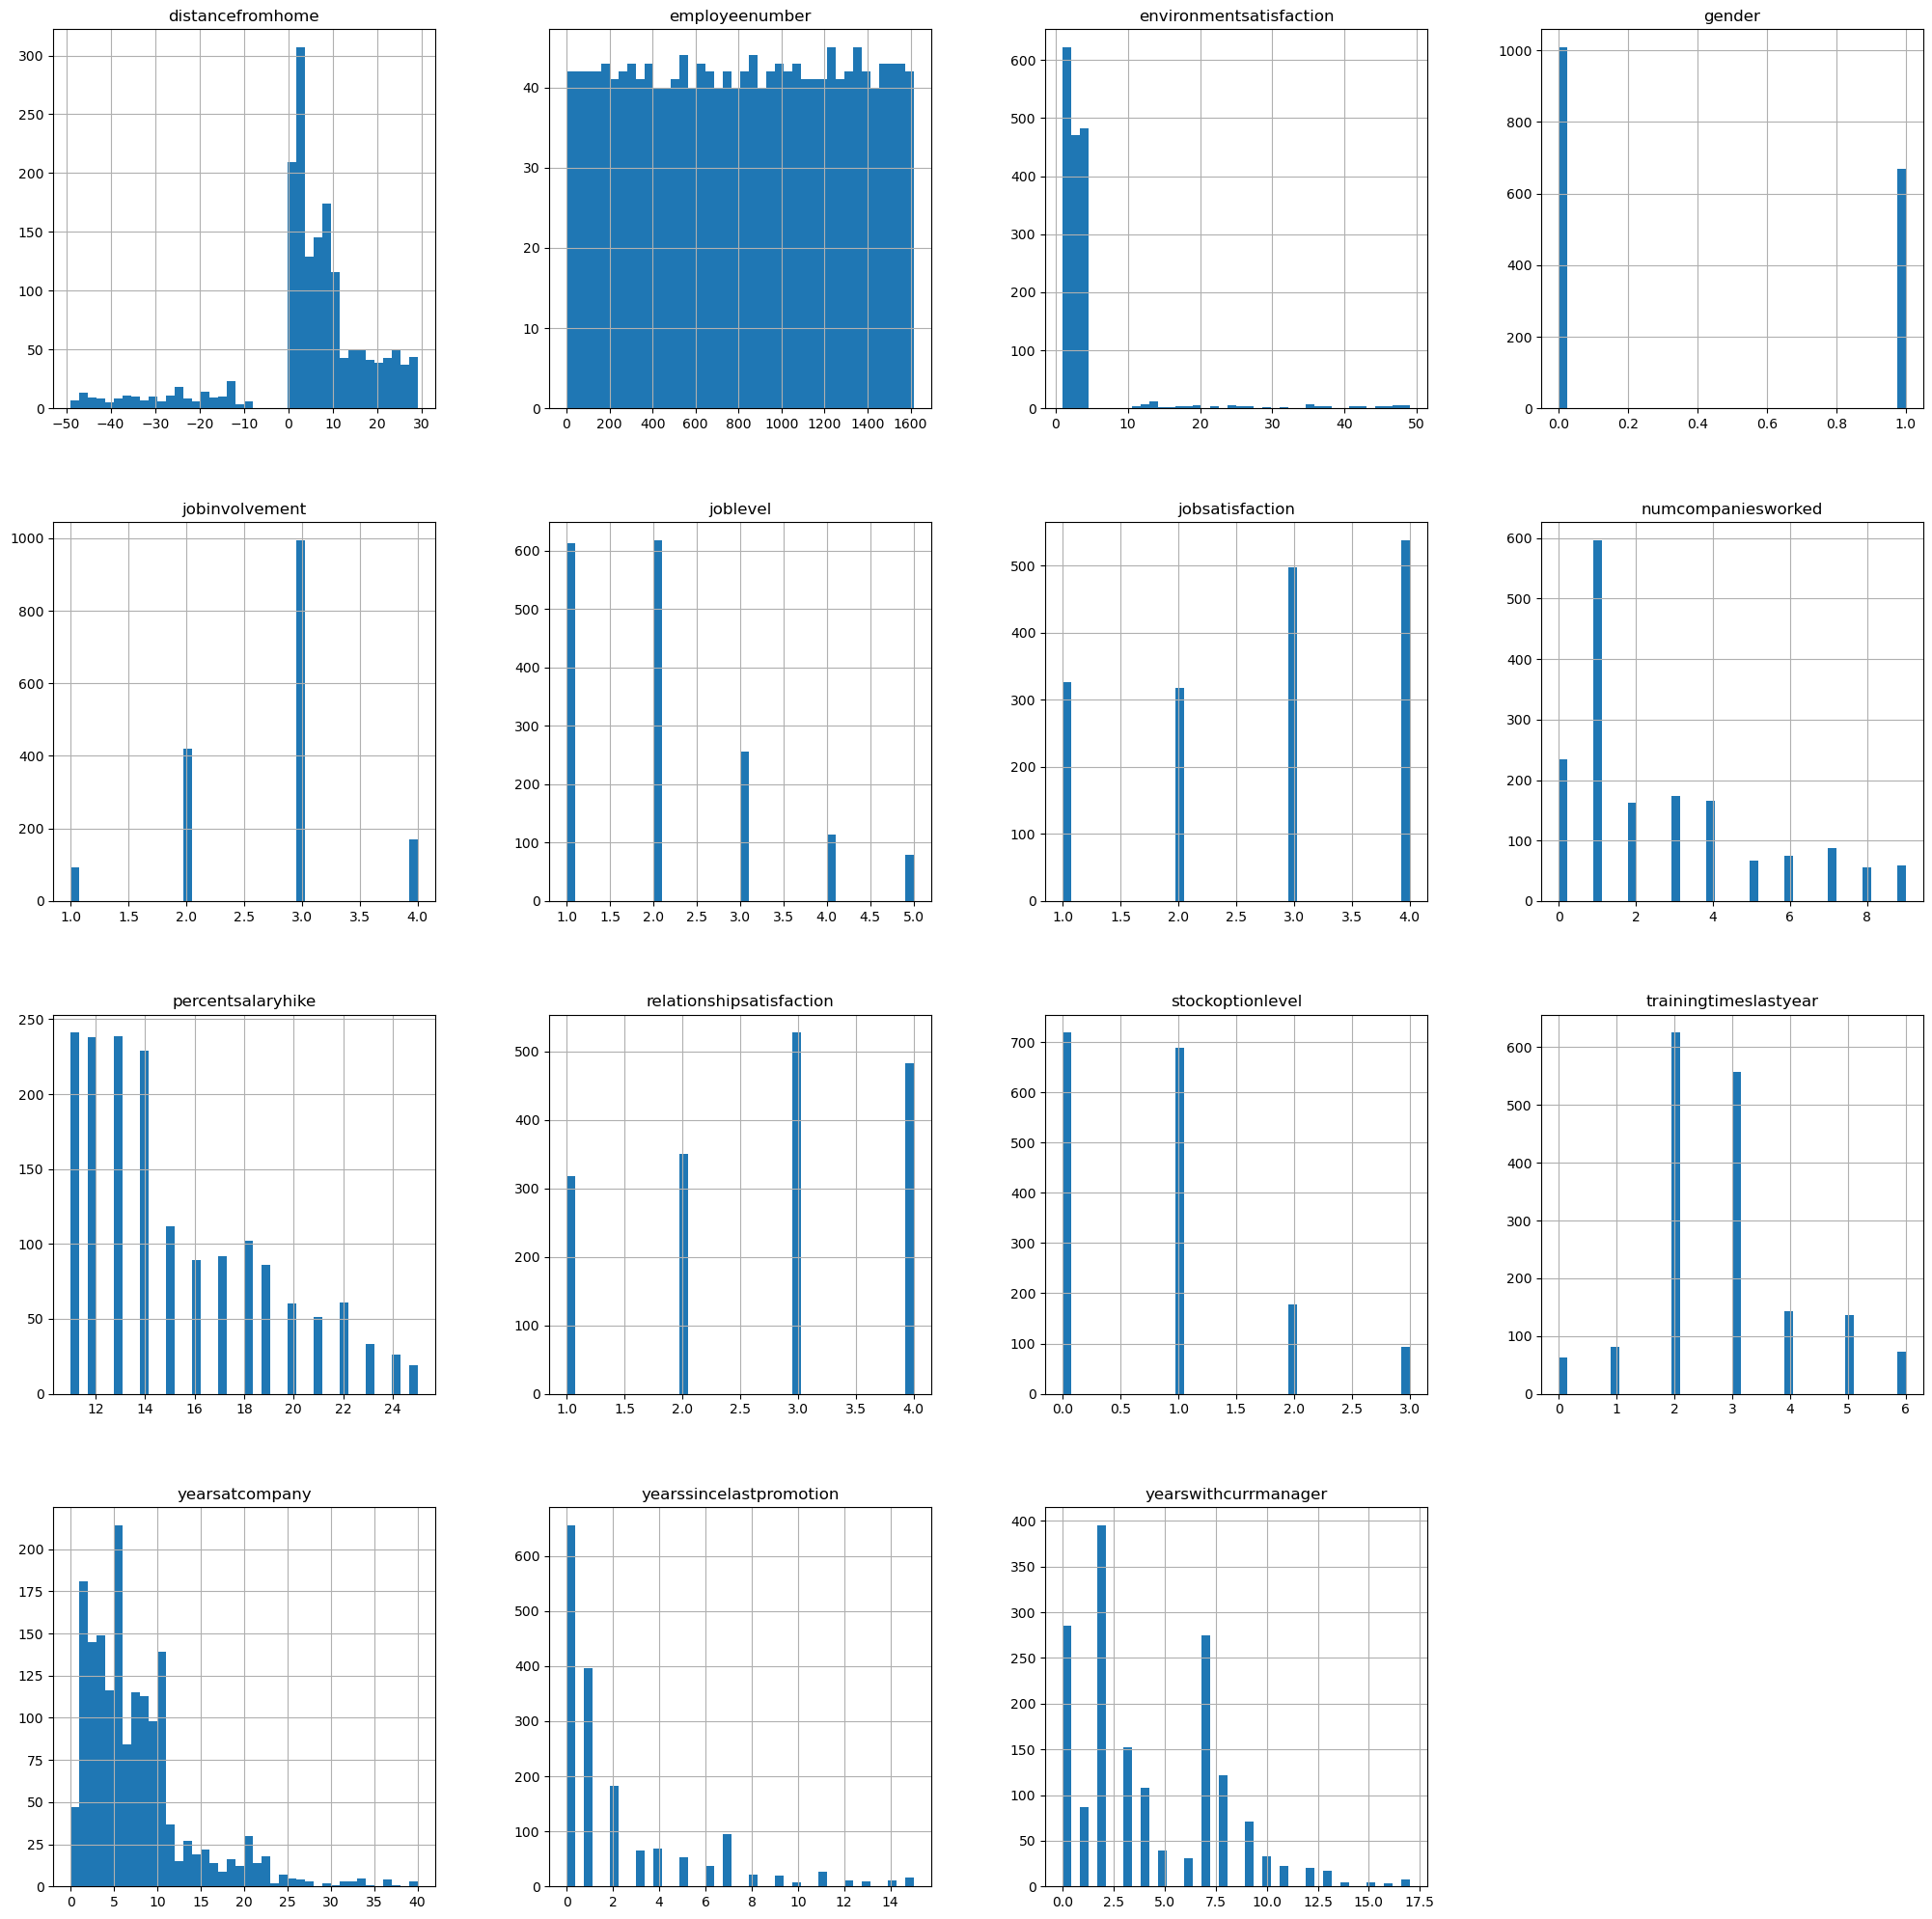

In [18]:
num_bins = 40
df.hist(bins=num_bins, figsize=(25,25))
plt.savefig("histogram_plots")
plt.show()

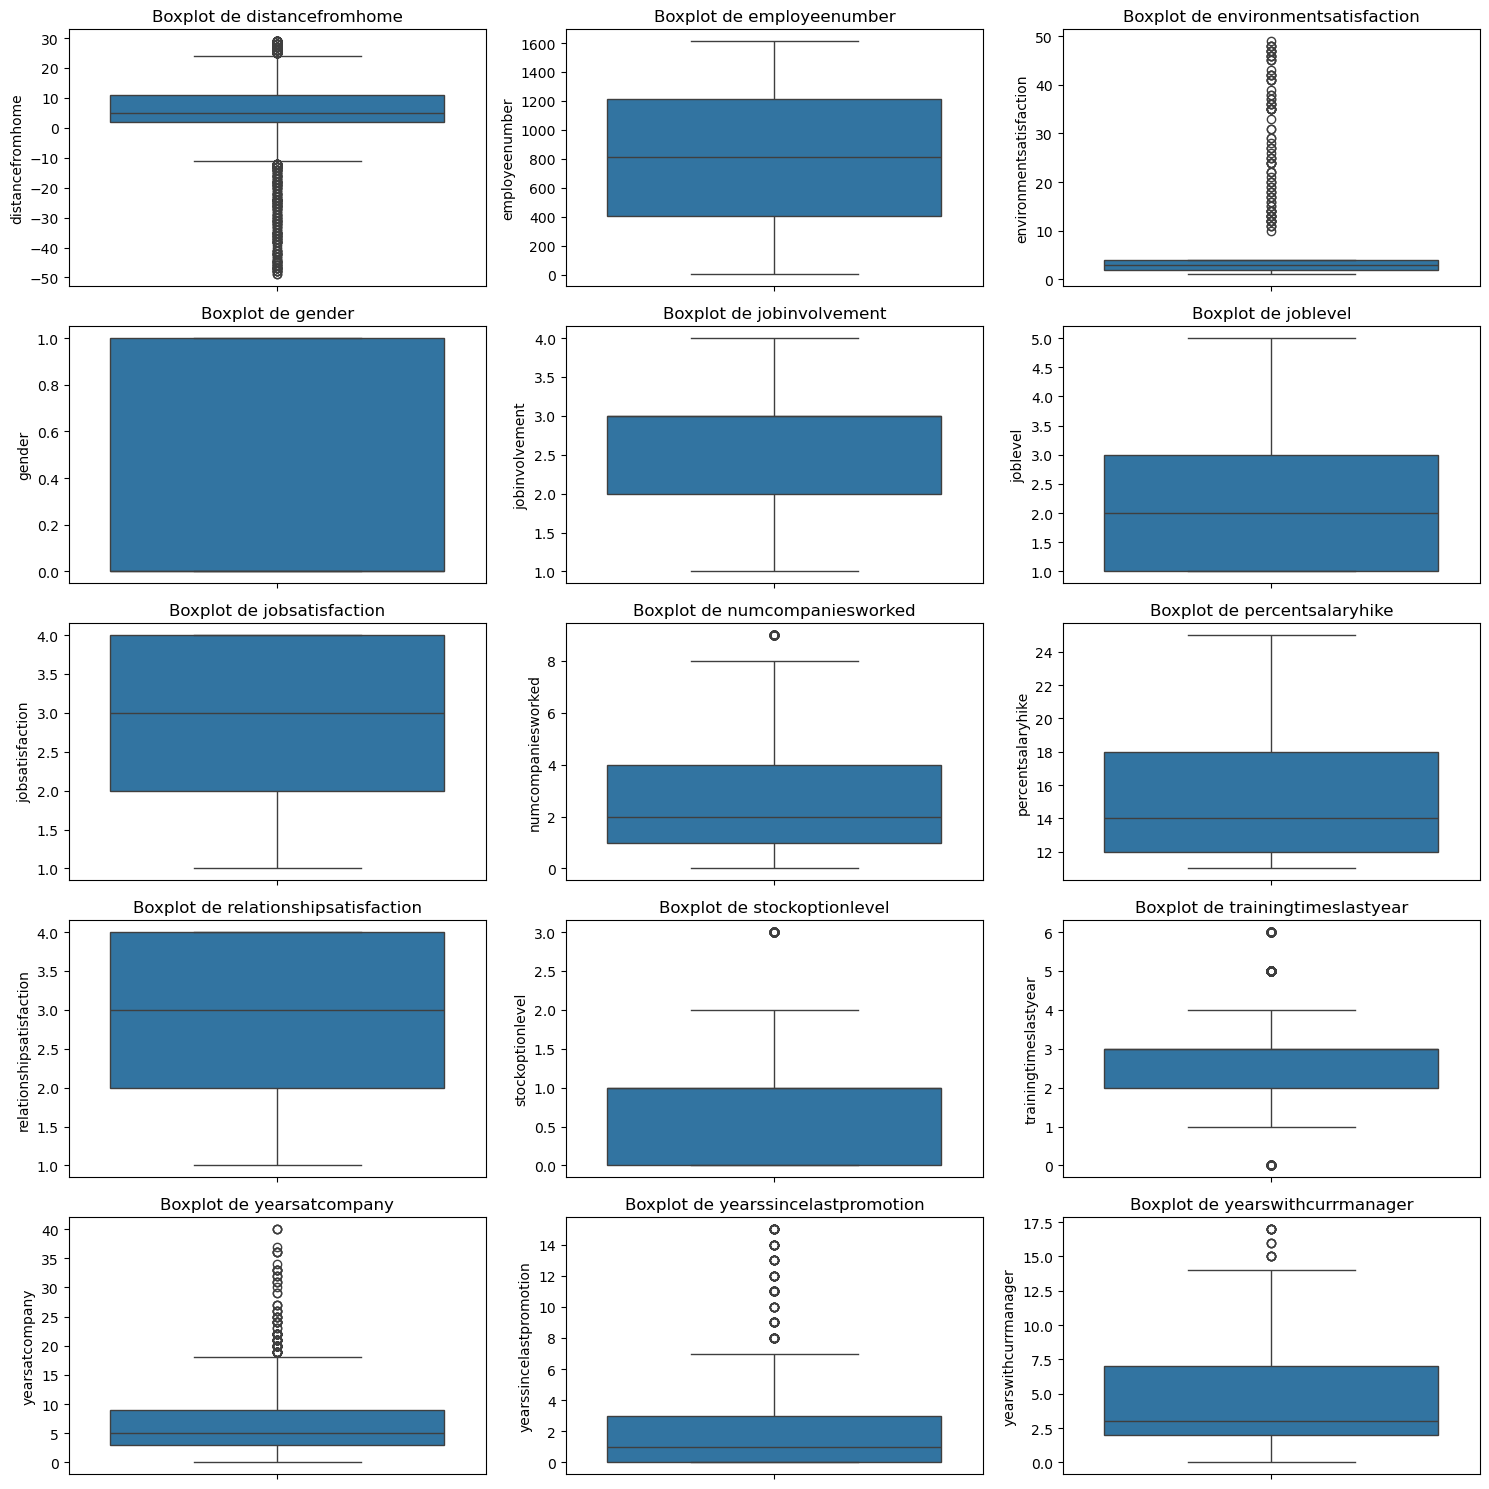

In [19]:
numeric_columns = df.select_dtypes(include=['number']).columns
rows = (len(numeric_columns) // 3) + (len(numeric_columns) % 3 > 0)  # Calcula el número de filas necesarias
cols = 3

# Definir tamaño del gráfico
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows*3))
if rows > 1:
    axes = axes.flatten()
# Iterar sobre cada columna numérica y graficar un boxplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

# Limpieza

In [20]:
visual.extract_data(df)

INFORMACIÓN SOBRE COLUMNAS
  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1678 non-null   object
 1   attrition                 1678 non-null   object
 2   businesstravel            877 non-null    object
 3   department                312 non-null    object
 4   distancefromhome          1678 non-null   int64 
 5   education                 1678 non-null   object
 6   educationfield            904 non-null    object
 7   employeenumber            1678 non-null   int64 
 8   environmentsatisfaction   1678 non-null   int64 
 9   gender                    1678 non-null   int64 
 10  jobinvolvement            1678 non-null   int64 
 11  joblevel                  1678 non-null   int64 
 12  jobrole                   1678 non-null   object
 13  jobsatisfaction           1678 non-null   int64 

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,salary,roledepartament,remotework
0,51,No,NaN,NaN,6,3,NaN,1,1,0,3,5,resEArch DIREcToR,3,NaN,"16280,83$",7,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,15,15,"195370,00$",NaN,Yes
1,52,No,NaN,NaN,1,4,Life Sciences,2,3,0,2,5,ManAGeR,3,NaN,NaN,0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,11,9,"199990,00$",NaN,1
2,42,No,travel_rarely,Research & Development,4,2,Technical Degree,3,3,0,3,5,ManaGER,4,Married,NaN,1,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,11,15,"192320,00$",ManaGER - Research & Development,1
3,47,No,travel_rarely,NaN,2,4,Medical,4,1,1,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$",3,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,5,6,"171690,00$",NaN,False
4,46,No,NaN,NaN,3,3,Technical Degree,5,1,1,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$",2,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,2,8,NaN,NaN,0


In [21]:
limp.letras_a_numeros(df, 'age')

array([51, 52, 42, 47, 46, 48, 59, 41, 56, 38, 55, 40, 58, 35, 45, 33, 36,
       34, 53, 43, 60, 32, 37, 49, 39, 50, 44, 30, 29, 31, 54, 57, 27, 28,
       26, 25, 24, 23, 22, 21, 20, 19, 18])

In [22]:
divisas = ['monthlyincome', 'salary']

for divi in divisas:
    limp.limpieza_divisas (df, divi, float)

In [23]:
numeros_limp = ['totalworkingyears', 'worklifebalance']

for num in numeros_limp:
    limp.limpieza_numeros(df, num, float)

In [24]:
limp.limpieza_boleanos (df, 'remotework', object)

In [25]:
limp.cambio_tipo(df, 'education', int)

In [26]:
limp.minusculas_titulos(df)

In [27]:
limp.minusculas(df)

In [28]:
limp.quitar_espacios(df)

In [29]:
limp.limpieza_genero (df, 'gender', str)

In [30]:
limp.limpieza_maritalstatus (df, 'maritalstatus')

In [31]:
limp.primer_digito(df, 'environmentsatisfaction')

In [32]:
cambio_a_objeto = ['relationshipsatisfaction', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'stockoptionlevel', 'worklifebalance', 'education', 'jobrole', 'environmentsatisfaction']
for col in cambio_a_objeto:
    limp.cambio_tipo(df, col, object)


In [33]:
enteros = ['worklifebalance']

for num_ent in enteros:
    limp.cambiar_a_entero(df, num_ent)

In [34]:
visual.extract_data(df)

INFORMACIÓN SOBRE COLUMNAS
  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1678 non-null   int64  
 1   attrition                 1678 non-null   object 
 2   businesstravel            877 non-null    object 
 3   department                312 non-null    object 
 4   distancefromhome          1678 non-null   int64  
 5   education                 1678 non-null   object 
 6   educationfield            904 non-null    object 
 7   employeenumber            1678 non-null   int64  
 8   environmentsatisfaction   1678 non-null   object 
 9   gender                    1678 non-null   object 
 10  jobinvolvement            1678 non-null   object 
 11  joblevel                  1678 non-null   object 
 12  jobrole                   1678 non-null   object 
 13  jobsatisfaction           1678 no

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,salary,roledepartament,remotework
0,51,no,NaN,NaN,6,3,NaN,1,1,Male,3,5,research director,3,NaN,16280.83,7,no,13,"3,0",3,full time,0,NaN,5,3,20,15,15,195370.0,NaN,yes
1,52,no,NaN,NaN,1,4,life sciences,2,3,Male,2,5,manager,3,NaN,NaN,0,NaN,14,"3,0",1,NaN,1,34.0,5,3,33,11,9,199990.0,NaN,yes
2,42,no,travel_rarely,research & development,4,2,technical degree,3,3,Male,3,5,manager,4,married,NaN,1,no,11,"3,0",4,NaN,0,22.0,3,<NA>,22,11,15,192320.0,manager - research & development,yes
3,47,no,travel_rarely,NaN,2,4,medical,4,1,Female,3,4,research director,3,married,14307.50,3,NaN,19,"3,0",2,full time,2,NaN,2,<NA>,20,5,6,171690.0,NaN,no
4,46,no,NaN,NaN,3,3,technical degree,5,1,Female,4,4,sales executive,1,divorced,12783.92,2,no,12,"3,0",4,NaN,1,NaN,5,3,19,2,8,NaN,NaN,no


Gestion y limpieza de nulos:
overtime (object),
marital status (object), 
totalworkingyears (int64), 
standardhours (int64), 
worklifebalance (int64)




- **Para variables categóricas**

    - Imputación basada en la moda: Podemos reemplazar los valores nulos con la moda (valor más frecuente) de la variable. Esto se puede hacer utilizando el método `fillna()` de Pandas.

    - Imputación como una categoría especial: En algunos casos, podríamos querer mantener los valores nulos como una categoría especial si representan una condición específica en tus datos.
 
 

- **Para variables numéricas**

    - Imputación basada en estadísticos: Podemos utilizar la media, la mediana o la moda de la variable para reemplazar los valores nulos. Esto se puede hacer utilizando la clase `SimpleImputer` de Scikit-learn o el `fillna` de Pandas .

    - Imputación basada en modelos: Podemos utilizar modelos de regresión u otros modelos de aprendizaje automático para predecir los valores nulos basándote en las otras variables.  `KNNImputer`.

## Recordamos la imputacion para variables categóricas


    - Imputación basada en la moda: Podemos reemplazar los valores nulos con la moda (valor más frecuente) de la variable. Esto se puede hacer utilizando el método `fillna()` de Pandas.

    - Imputación como una categoría especial: En algunos casos, podríamos querer mantener los valores nulos como una categoría especial si representan una condición específica en tus datos.

- % ALTO nulos:
    - se imputan con la moda
    - se imputan con técnicas más avanzadas
- % BAJO nulos:
    - distribución de categoría dominante -> imputación con la moda
    - distribución no dominante -> nueva categoría

- **Para variables categóricas**

    - Imputación basada en la moda: Podemos reemplazar los valores nulos con la moda (valor más frecuente) de la variable. Esto se puede hacer utilizando el método `fillna()` de Pandas.

    - Imputación como una categoría especial: En algunos casos, podríamos querer mantener los valores nulos como una categoría especial si representan una condición específica en tus datos.
 
 

- **Para variables numéricas**

    - Imputación basada en estadísticos: Podemos utilizar la media, la mediana o la moda de la variable para reemplazar los valores nulos. Esto se puede hacer utilizando la clase `SimpleImputer` de Scikit-learn o el `fillna` de Pandas .

    - Imputación basada en modelos: Podemos utilizar modelos de regresión u otros modelos de aprendizaje automático para predecir los valores nulos basándote en las otras variables.  `KNNImputer`.

-Overtime: 41.477

-Marital Status: 40.22

-standardhours: 20,91

-worklifebalance (int64): 6,79

-Businesstravel: 47,73

-performancerating: 11.91

Podemos ver que todas las columnas categoricas son > 10%, por lo que es un % ALTO, e imputaremos los NULOS por MODA.


In [35]:
lista_moda = ['overtime', 'maritalstatus', 'standardhours', 'worklifebalance', 'businesstravel', 'performancerating']
for col in lista_moda:
    limp.objeto_moda(df, col)

In [36]:
nulos = df.isnull().sum()/df.shape[0]*100
# nulos ordenados de mayor a menor
nulos.sort_values(ascending=False)

roledepartament             81.406436
department                  81.406436
educationfield              46.126341
totalworkingyears           32.717521
monthlyincome               29.141836
salary                      16.984505
age                          0.000000
relationshipsatisfaction     0.000000
standardhours                0.000000
stockoptionlevel             0.000000
yearsatcompany               0.000000
trainingtimeslastyear        0.000000
worklifebalance              0.000000
percentsalaryhike            0.000000
yearssincelastpromotion      0.000000
yearswithcurrmanager         0.000000
performancerating            0.000000
numcompaniesworked           0.000000
overtime                     0.000000
attrition                    0.000000
maritalstatus                0.000000
jobsatisfaction              0.000000
jobrole                      0.000000
joblevel                     0.000000
jobinvolvement               0.000000
gender                       0.000000
environments

In [37]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['department', 'educationfield', 'roledepartament'], dtype='object')


In [38]:
# sacamos el 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df[col].value_counts() / df.shape[0]*100)  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna DEPARTMENT


department
research & development    12.097735
sales                      5.542312
human resources            0.953516
Name: count, dtype: float64

........................
La distribución de las categorías para la columna EDUCATIONFIELD


educationfield
life sciences       21.871275
medical             17.044100
marketing            6.317044
technical degree     4.171633
other                3.754470
human resources      0.715137
Name: count, dtype: float64

........................
La distribución de las categorías para la columna ROLEDEPARTAMENT


roledepartament
sales executive  -  sales                               4.231228
research scientist  -  research & development           3.814064
laboratory technician  -  research & development        3.575685
healthcare representative  -  research & development    1.609058
manufacturing director  -  research & development       1.311085
sales representative  -  sales                          1.013111
research director  -  research & development            0.953516
human resources  -  human resources                     0.893921
manager  -  research & development                      0.834327
manager  -  sales                                       0.297974
manager  -  human resources                             0.059595
Name: count, dtype: float64

........................


- **Para variables numéricas**

    - Imputación basada en estadísticos: Podemos utilizar la media, la mediana o la moda de la variable para reemplazar los valores nulos. Esto se puede hacer utilizando la clase `SimpleImputer` de Scikit-learn o el `fillna` de Pandas .

    - Imputación basada en modelos: Podemos utilizar modelos de regresión u otros modelos de aprendizaje automático para predecir los valores nulos basándote en las otras variables. Esto se puede hacer utilizando la clase `IterativeImputer` o el `KNNImputer`.

Gestion de nulos de variables numericas:

-totalworkingyears (int64): 32,71

-distancefromhome: 12,04

-Salary: 16.98


Vemos ahora como nos enfrentaremos a la gestión de cada una de las columnas:

- "worklifebalance" tiene valores por debajo del 10%, por lo que optaremos por reemplazar por la media o mediana. Para eso usaremos: 

    - usaremos el método ".fillna()" o usaremos el método "SimpleImputer" de Sklearn. 

    La diferencia entre el *fillna* y el *SimpleImputer* solo esta en el código ya que ambos reemplazar por la media o la mediana sin utilizar ningún método más avanzado. 

- "totalworkingyears": en este caso tenemos un porcentaje alto de nulos (>20%): por lo que optaremos por reemplazar los nulos con métodos avanzados, lo haremos con los métodos para que podamos comparar. Esto se puede hacer utilizando la clase `IterativeImputer` o el `KNNImputer`.

In [39]:
# para decidir si usamos la media o la mediana lo que haremos es hacer un describe de la columna para saber cuales son estos valores
df["worklifebalance"].describe()[["mean", "50%"]]

mean    2.775924
50%          3.0
Name: worklifebalance, dtype: Float64

Vemos que la meadia es de 3 y la mediana de 2.7, ambas se parecen mucho, no distan demasiado la una de la otra. Podemos coger cualquiera de ellas para gestionar los nulos de "worklifebalance"

In [40]:
df.loc[df['distancefromhome'] < 0, 'distancefromhome'] = np.nan


In [41]:
dfh_negativo = df[df['distancefromhome'] < 0]
dfh_negativo

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,salary,roledepartament,remotework


In [42]:
nulos = df.isnull().sum()/df.shape[0]*100

# nulos ordenados de mayor a menor
nulos.sort_values(ascending=False)

roledepartament             81.406436
department                  81.406436
educationfield              46.126341
totalworkingyears           32.717521
monthlyincome               29.141836
salary                      16.984505
distancefromhome            12.038141
age                          0.000000
relationshipsatisfaction     0.000000
standardhours                0.000000
stockoptionlevel             0.000000
yearsatcompany               0.000000
trainingtimeslastyear        0.000000
worklifebalance              0.000000
percentsalaryhike            0.000000
yearssincelastpromotion      0.000000
yearswithcurrmanager         0.000000
performancerating            0.000000
numcompaniesworked           0.000000
overtime                     0.000000
attrition                    0.000000
maritalstatus                0.000000
jobsatisfaction              0.000000
jobrole                      0.000000
joblevel                     0.000000
jobinvolvement               0.000000
gender      

In [43]:
imputer_iter = KNNImputer(n_neighbors=5)
df['distancefromhome'] = imputer_iter.fit_transform(df[['distancefromhome']])

In [44]:
imputer_iter = KNNImputer(n_neighbors=5)
df['salary'] = imputer_iter.fit_transform(df[['salary']])

In [45]:
imputer_iter = KNNImputer(n_neighbors=5)
df['totalworkingyears'] = imputer_iter.fit_transform(df[['totalworkingyears']])

# VISUALIZACIÓN

In [46]:
# Matriz de correlación
num_vars = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[num_vars].corr()

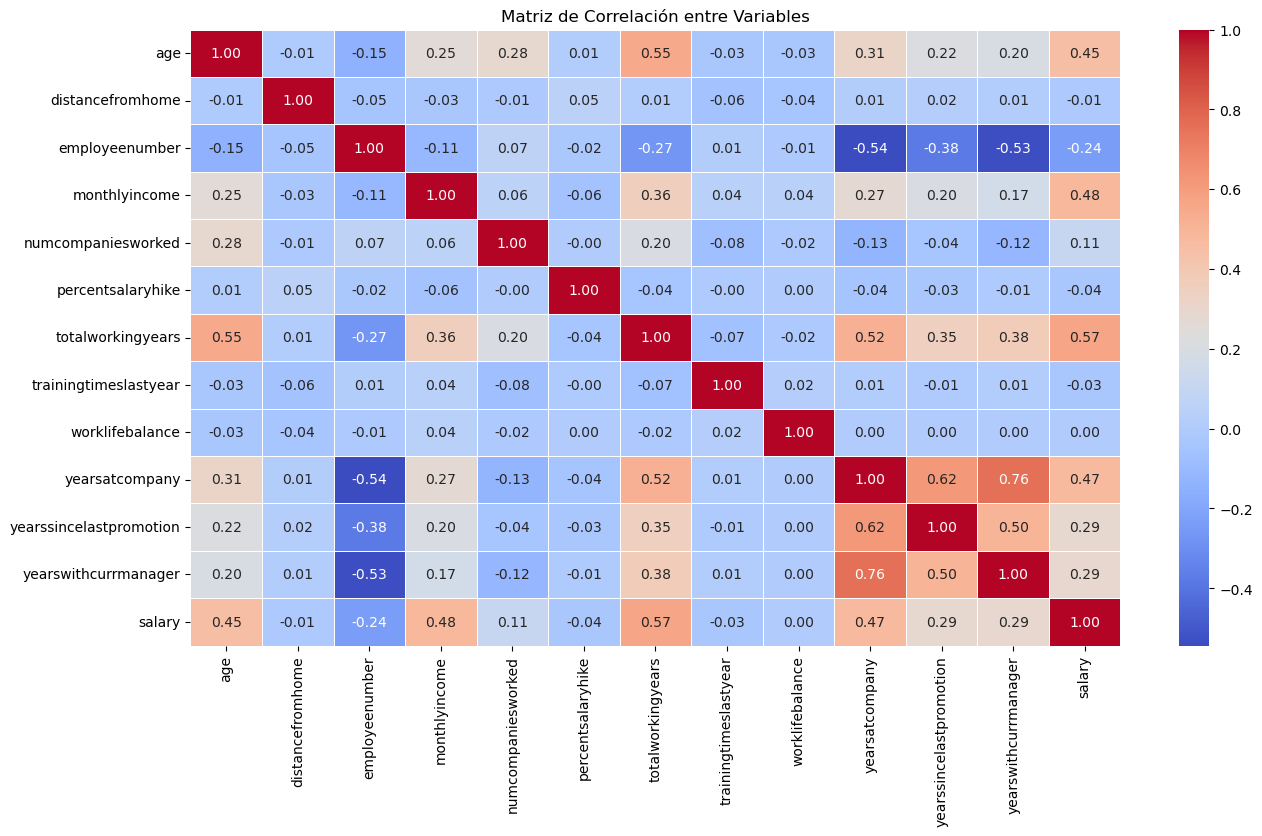

In [47]:
# Visualiza la matriz de correlación utilizando seaborn
plt.figure(figsize=(15, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Añade título
plt.title('Matriz de Correlación entre Variables')

# Muestra el gráfico

plt.show()

In [48]:
def grafico_pastel(df, col_categoria, col_grupo=None):
    if col_grupo:
        grupos = df[col_grupo].unique()
        for grupo in grupos:
            datos = df[df[col_grupo] == grupo][col_categoria].value_counts()
            plt.figure(figsize=(6, 6))
            plt.pie(datos, labels=datos.index, autopct='%1.1f%%', startangle=140)
            plt.title(f'{col_categoria} para {col_grupo} = {grupo}')
            plt.axis('equal')
            plt.show()
    else:
        datos = df[col_categoria].value_counts()
        plt.figure(figsize=(6, 6))
        plt.pie(datos, labels=datos.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Distribución de {col_categoria}')
        plt.axis('equal')
        plt.show()


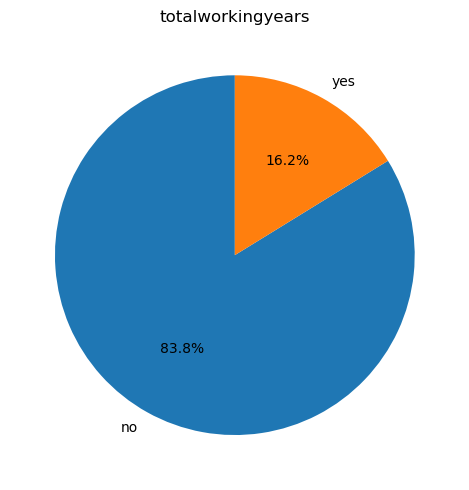

In [49]:
estadistica.grafico_pastel(df,'attrition','totalworkingyears')

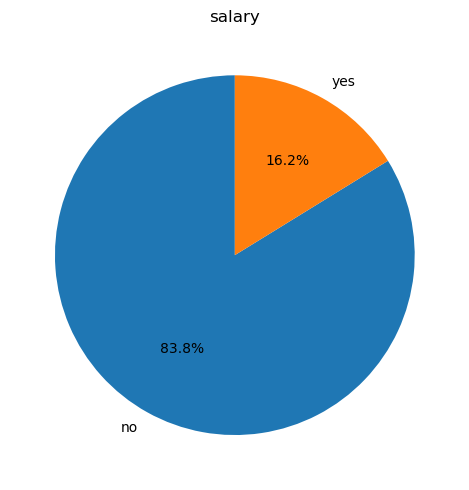

In [50]:
estadistica.grafico_pastel(df,'attrition', 'salary')

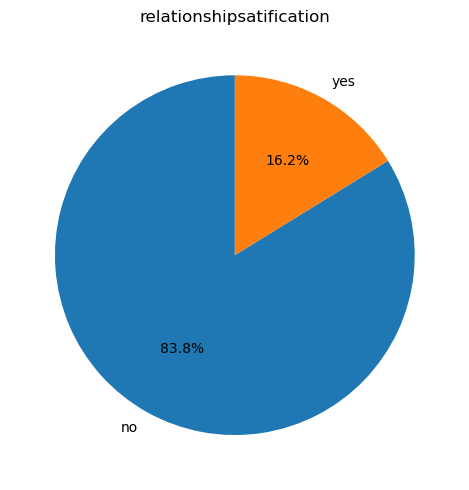

In [51]:
estadistica.grafico_pastel(df,'attrition','relationshipsatification')

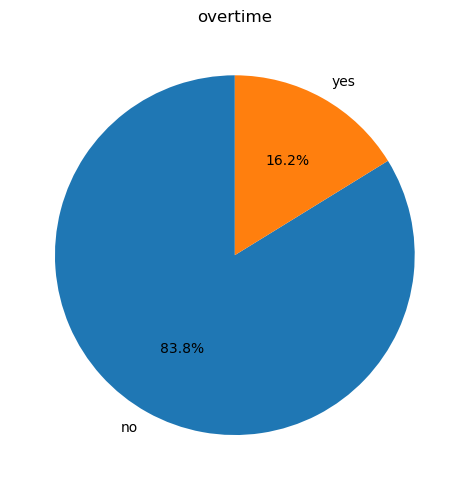

In [52]:
estadistica.grafico_pastel(df,'attrition','overtime')

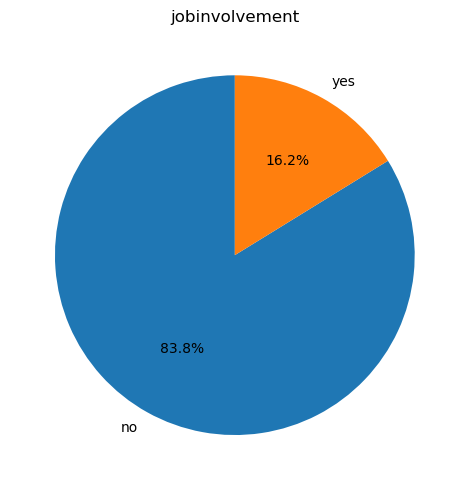

In [53]:
estadistica.grafico_pastel(df,'attrition', 'jobinvolvement')

## Gráficos con variables categoricas (entre variables categoricas)

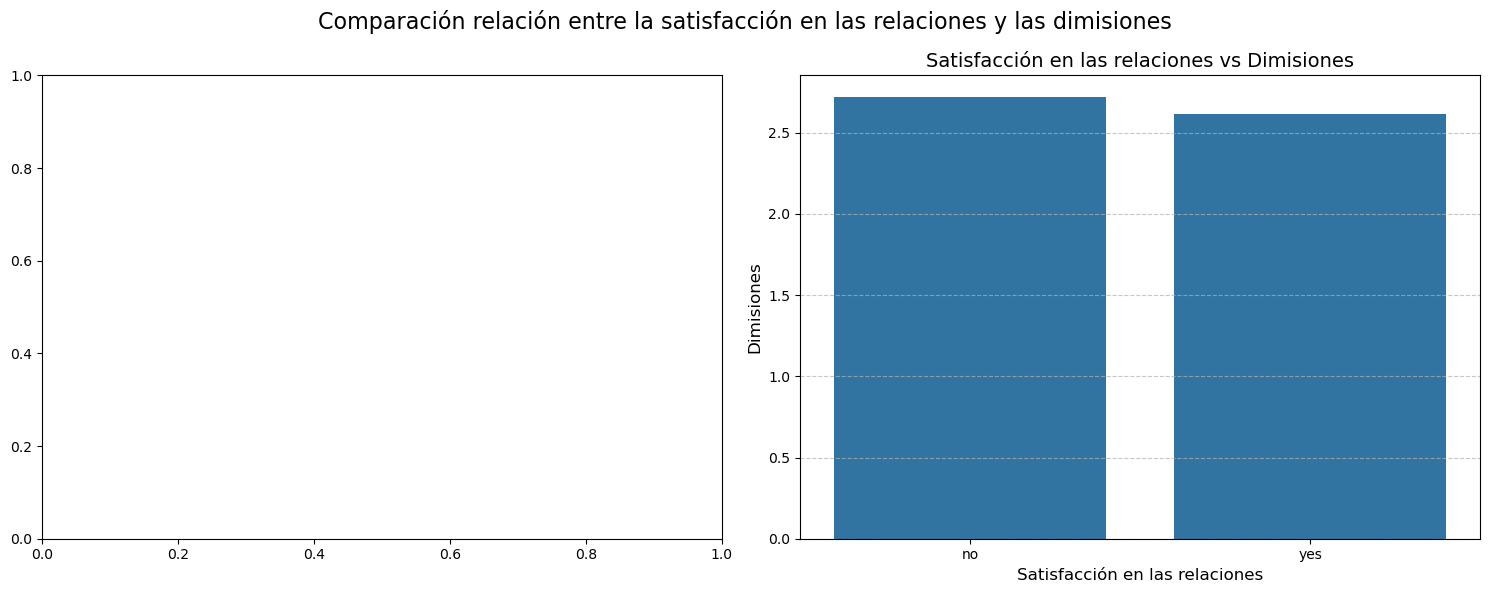

In [54]:

# Gráfico de barras para la relación entre la satisfacción en las relaciones y las dimisiones

# añadimos el 'plt.xticks()' para que se muestren las etiqu# Gráfico de barras para la relación entre la satisfacción en las relaciones y las dimisiones
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.barplot(x = "attrition", 
            y = "relationshipsatisfaction", 
            data = df,
            errorbar=None,
            ax = axes[1], 
        )
# añadimos el nombre de los ejes
plt.xlabel("Satisfacción en las relaciones", fontsize=12)
plt.ylabel("Dimisiones", fontsize=12)

# añadimos título al conjunto de todas las gráficas usando '.suptitle()'
plt.suptitle("Comparación relación entre la satisfacción en las relaciones y las dimisiones", fontsize=16)  
# añadimos el título a la gráfica
axes[1].set_title("Satisfacción en las relaciones vs Dimisiones", fontsize=14)
# añadimos el nombre de los ejes
axes[1].set_xlabel("Satisfacción en las relaciones", fontsize=12)
axes[1].set_ylabel("Dimisiones", fontsize=12)
# añadimos el 'plt.xticks()' para que se muestren las etiquetas del eje x
plt.xticks(fontsize=10)
# añadimos el 'plt.yticks()' para que se muestren las etiquetas del eje y
plt.yticks(fontsize=10)
# añadimos el 'plt.grid()' para que se muestren las líneas de la cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)
# añadimos el 'plt.subplots_adjust()' para ajustar el espacio entre las gráficas
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.4)
# añadimos el 'plt.tigth_layout()' para que se ajusten los elementos de la gráfica
plt.tight_layout()

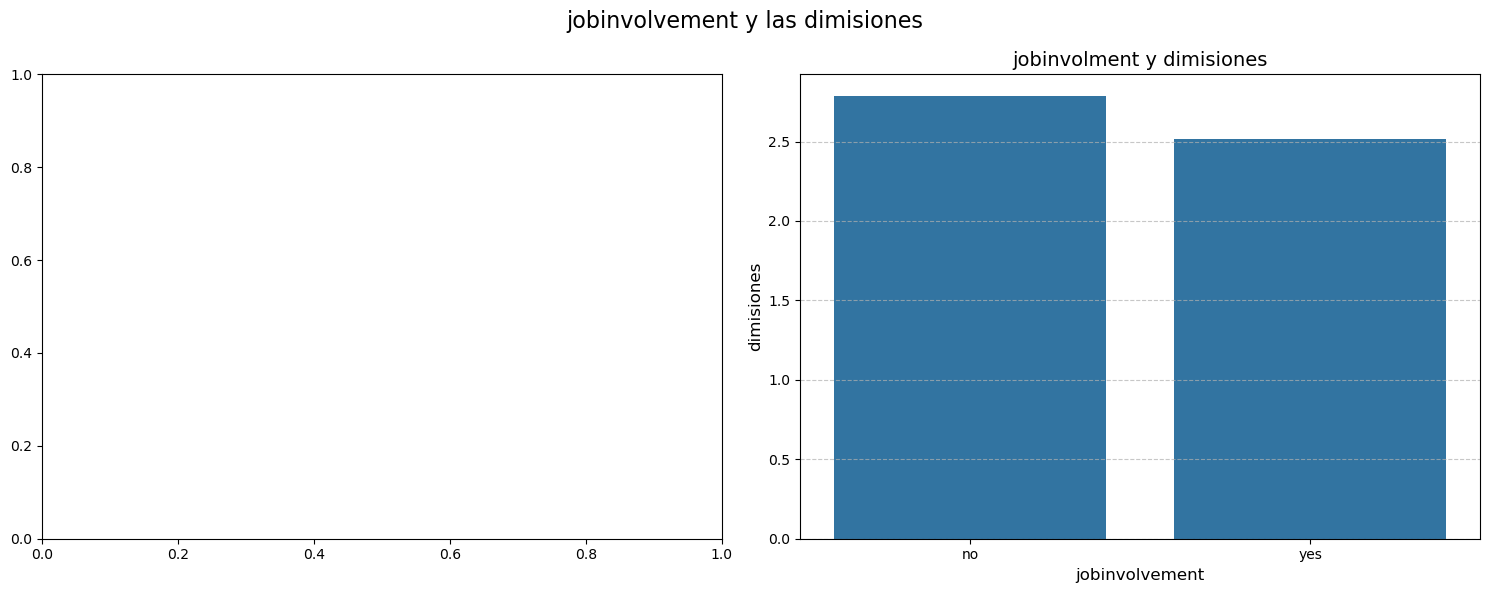

In [55]:
# Gráfico de barras para la relación entre la satisfacción en las relaciones y las dimisiones

# añadimos el 'plt.xticks()' para que se muestren las etiqu# Gráfico de barras para la relación entre la satisfacción en las relaciones y las dimisiones
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.barplot(x = "attrition", 
            y = "jobinvolvement", 
            data = df,
            errorbar=None,
            ax = axes[1], 
        )
# añadimos el nombre de los ejes
plt.xlabel("attrition", fontsize=12)
plt.ylabel("jobinvolvement", fontsize=12)

# añadimos título al conjunto de todas las gráficas usando '.suptitle()'
plt.suptitle("jobinvolvement y las dimisiones", fontsize=16)  
# añadimos el título a la gráfica
axes[1].set_title("jobinvolment y dimisiones", fontsize=14)
# añadimos el nombre de los ejes
axes[1].set_xlabel("jobinvolvement", fontsize=12)
axes[1].set_ylabel("dimisiones", fontsize=12)
# añadimos el 'plt.xticks()' para que se muestren las etiquetas del eje x
plt.xticks(fontsize=10)
# añadimos el 'plt.yticks()' para que se muestren las etiquetas del eje y
plt.yticks(fontsize=10)
# añadimos el 'plt.grid()' para que se muestren las líneas de la cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)
# añadimos el 'plt.subplots_adjust()' para ajustar el espacio entre las gráficas
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.4)
# añadimos el 'plt.tigth_layout()' para que se ajusten los elementos de la gráfica
plt.tight_layout()

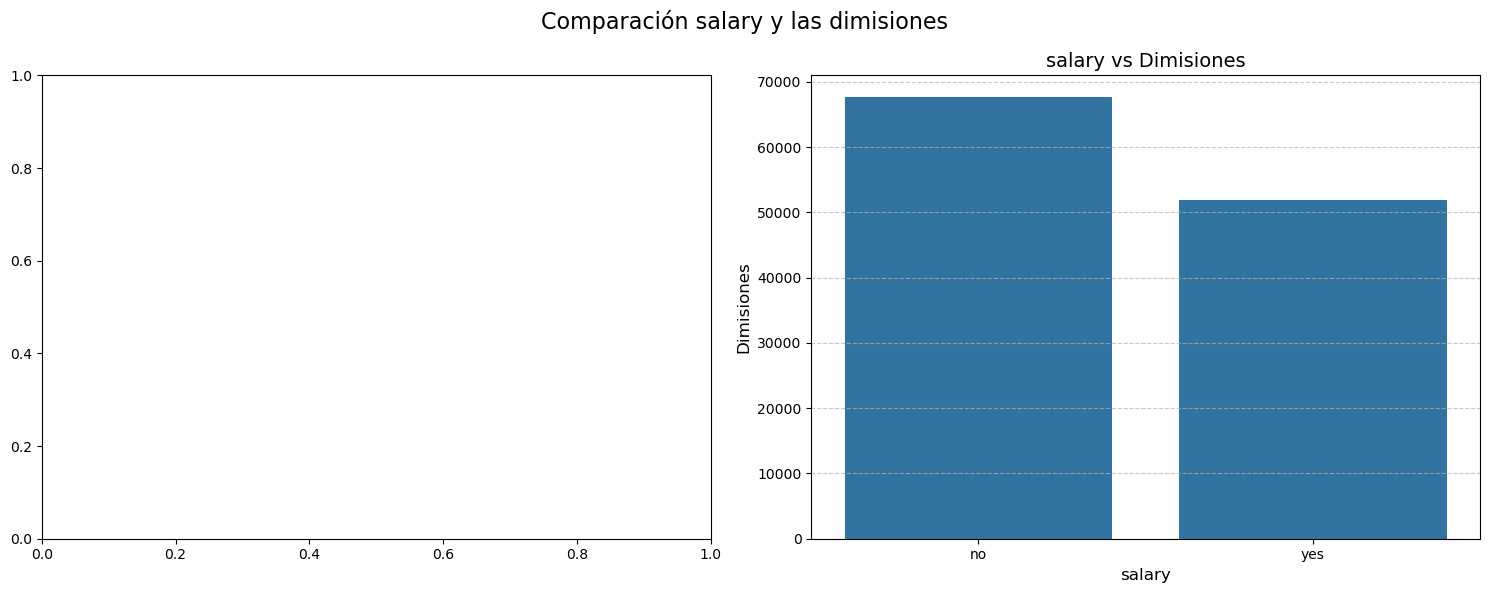

In [56]:
# Gráfico de barras para la relación entre la satisfacción en las relaciones y las dimisiones

# añadimos el 'plt.xticks()' para que se muestren las etiqu# Gráfico de barras para la relación entre la satisfacción en las relaciones y las dimisiones
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.barplot(x = "attrition", 
            y = "salary", 
            data = df,
            errorbar=None,
            ax = axes[1], 
        )
# añadimos el nombre de los ejes
plt.xlabel("salary", fontsize=12)
plt.ylabel("Dimisiones", fontsize=12)

# añadimos título al conjunto de todas las gráficas usando '.suptitle()'
plt.suptitle("Comparación salary y las dimisiones", fontsize=16)  
# añadimos el título a la gráfica
axes[1].set_title("salary vs Dimisiones", fontsize=14)
# añadimos el nombre de los ejes
axes[1].set_xlabel("salary", fontsize=12)
axes[1].set_ylabel("Dimisiones", fontsize=12)
# añadimos el 'plt.xticks()' para que se muestren las etiquetas del eje x
plt.xticks(fontsize=10)
# añadimos el 'plt.yticks()' para que se muestren las etiquetas del eje y
plt.yticks(fontsize=10)
# añadimos el 'plt.grid()' para que se muestren las líneas de la cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)
# añadimos el 'plt.subplots_adjust()' para ajustar el espacio entre las gráficas
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.4)
# añadimos el 'plt.tigth_layout()' para que se ajusten los elementos de la gráfica
plt.tight_layout()

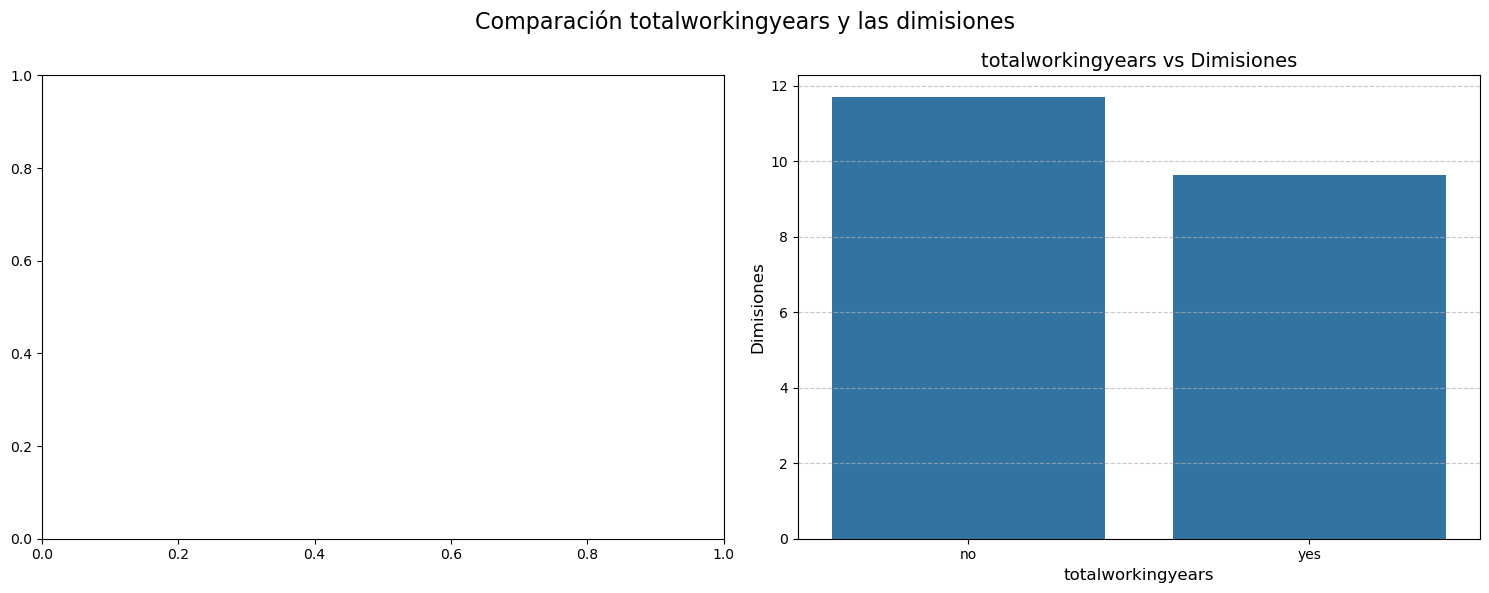

In [57]:
# Gráfico de barras para la relación entre la satisfacción en las relaciones y las dimisiones

# añadimos el 'plt.xticks()' para que se muestren las etiqu# Gráfico de barras para la relación entre la satisfacción en las relaciones y las dimisiones
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.barplot(x = "attrition", 
            y = "totalworkingyears", 
            data = df,
            errorbar=None,
            ax = axes[1], 
        )
# añadimos el nombre de los ejes
plt.xlabel("totalworkingyears", fontsize=12)
plt.ylabel("Dimisiones", fontsize=12)

# añadimos título al conjunto de todas las gráficas usando '.suptitle()'
plt.suptitle("Comparación totalworkingyears y las dimisiones", fontsize=16)  
# añadimos el título a la gráfica
axes[1].set_title("totalworkingyears vs Dimisiones", fontsize=14)
# añadimos el nombre de los ejes
axes[1].set_xlabel("totalworkingyears", fontsize=12)
axes[1].set_ylabel("Dimisiones", fontsize=12)
# añadimos el 'plt.xticks()' para que se muestren las etiquetas del eje x
plt.xticks(fontsize=10)
# añadimos el 'plt.yticks()' para que se muestren las etiquetas del eje y
plt.yticks(fontsize=10)
# añadimos el 'plt.grid()' para que se muestren las líneas de la cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)
# añadimos el 'plt.subplots_adjust()' para ajustar el espacio entre las gráficas
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.4)
# añadimos el 'plt.tigth_layout()' para que se ajusten los elementos de la gráfica
plt.tight_layout()

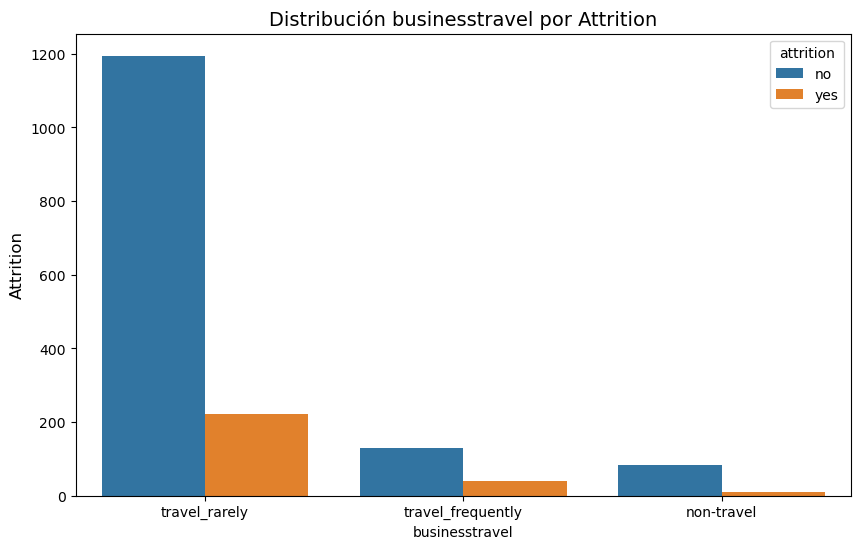

<Figure size 1200x600 with 0 Axes>

In [58]:
plt.figure(figsize=(10, 6))  # antes del countplot
sns.countplot(data=df, x='businesstravel', hue='attrition')
plt.title('Distribución businesstravel por Attrition' ,fontsize=14)
plt.xlabel('businesstravel', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.figure(figsize=(12, 6))  # Ancho x Alto
plt.tight_layout()  # <- evita que se corte el texto
plt.show()

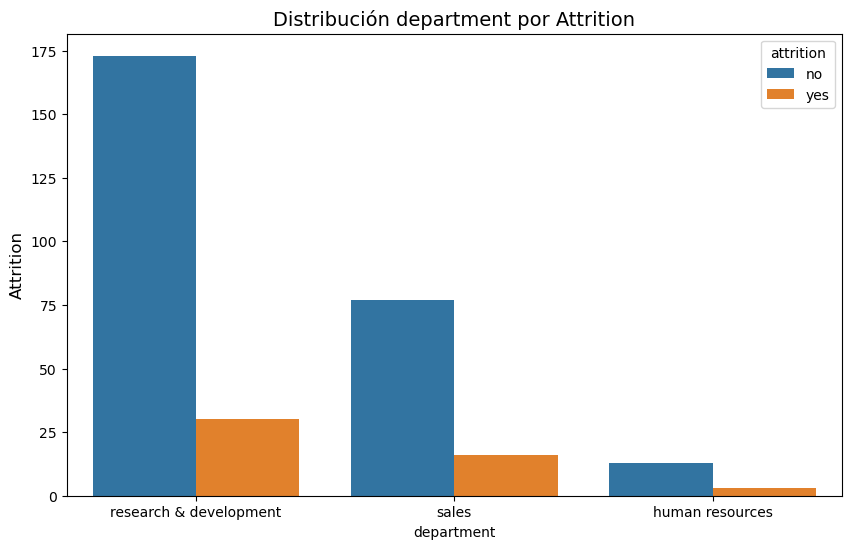

<Figure size 1200x600 with 0 Axes>

In [59]:
plt.figure(figsize=(10, 6))  # antes del countplot
sns.countplot(data=df, x='department', hue='attrition')
plt.title('Distribución department por Attrition' ,fontsize=14)
plt.xlabel('department', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.figure(figsize=(12, 6))  # Ancho x Alto
plt.tight_layout()  # <- evita que se corte el texto
plt.show()

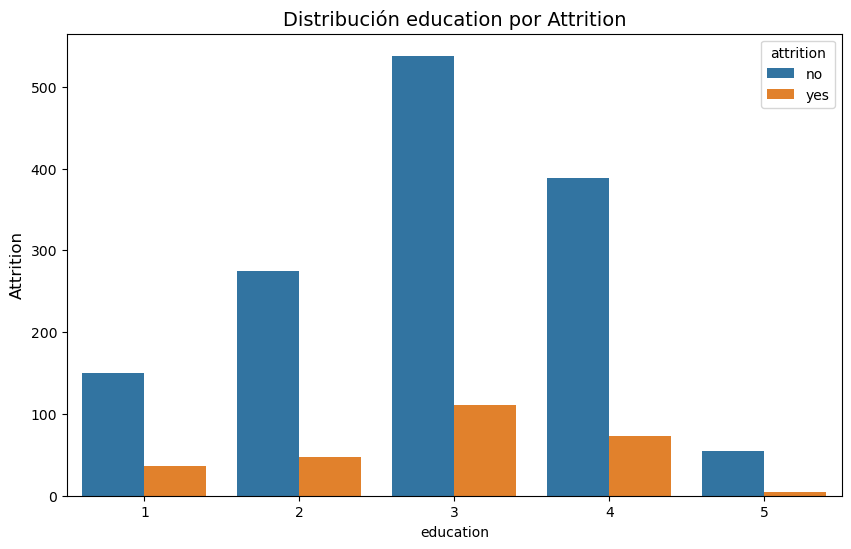

<Figure size 1200x600 with 0 Axes>

In [60]:
plt.figure(figsize=(10, 6))  # antes del countplot
sns.countplot(data=df, x='education', hue='attrition')
plt.title('Distribución education por Attrition' ,fontsize=14)
plt.xlabel('education', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.figure(figsize=(12, 6))  # Ancho x Alto
plt.tight_layout()  # <- evita que se corte el texto
plt.show()

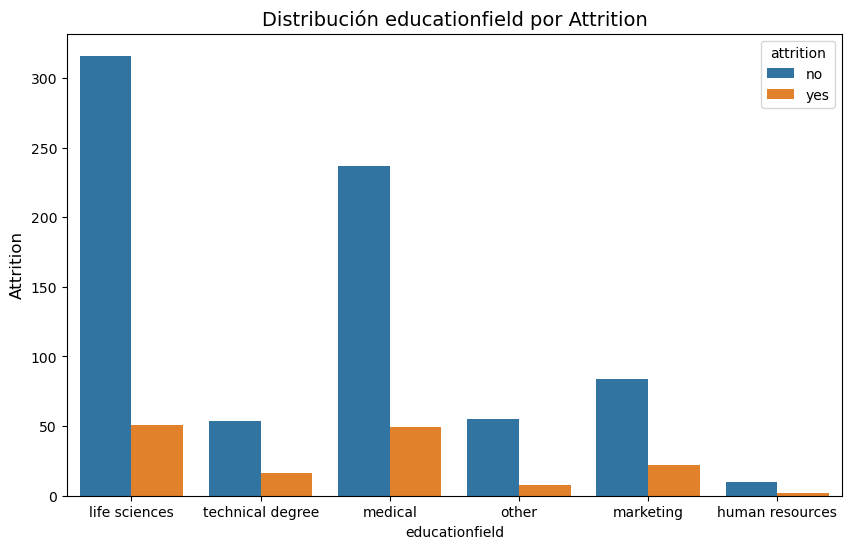

<Figure size 1200x600 with 0 Axes>

In [61]:
plt.figure(figsize=(10, 6))  # antes del countplot
sns.countplot(data=df, x='educationfield', hue='attrition')
plt.title('Distribución educationfield por Attrition' ,fontsize=14)
plt.xlabel('educationfield', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.figure(figsize=(12, 6))  # Ancho x Alto
plt.tight_layout()  # <- evita que se corte el texto
plt.show()

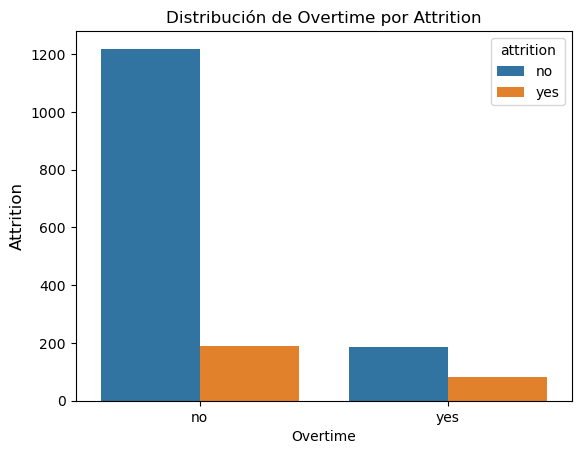

<Figure size 1200x600 with 0 Axes>

In [62]:
# Gráfico de barras: distribución de 'overtime' separada por 'attrition'
sns.countplot(data=df, x='overtime', hue='attrition')
plt.title('Distribución de Overtime por Attrition')
plt.xlabel('Overtime', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.figure(figsize=(12, 6))  # Ancho x Alto
plt.tight_layout()  # <- evita que se corte el texto
plt.show()

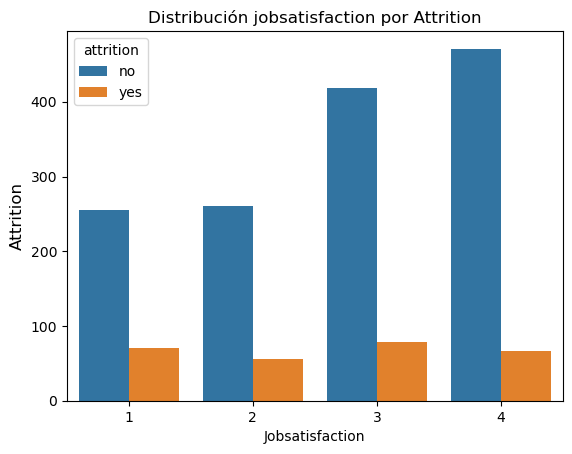

<Figure size 1200x600 with 0 Axes>

In [63]:
sns.countplot(data=df, x='jobsatisfaction', hue='attrition')
plt.title('Distribución jobsatisfaction por Attrition')
plt.xlabel('Jobsatisfaction', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.figure(figsize=(12, 6))  # Ancho x Alto
plt.tight_layout()  # <- evita que se corte el texto
plt.show()

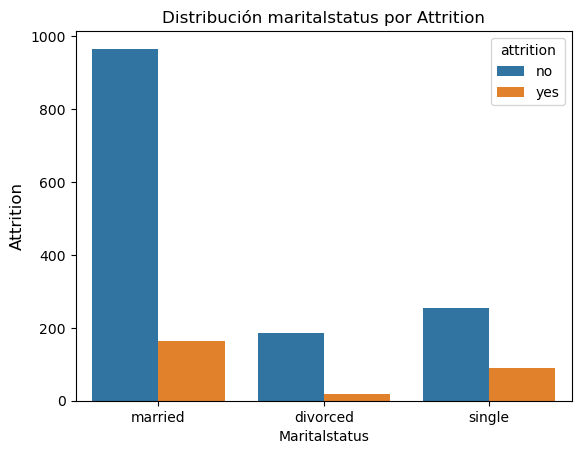

<Figure size 1200x600 with 0 Axes>

In [64]:
sns.countplot(data=df, x='maritalstatus', hue='attrition')
plt.title('Distribución maritalstatus por Attrition')
plt.xlabel('Maritalstatus', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.figure(figsize=(12, 6))  # Ancho x Alto
plt.tight_layout()  # <- evita que se corte el texto
plt.show()

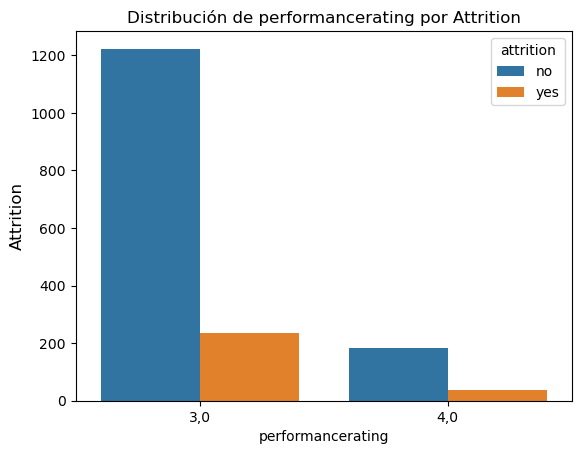

<Figure size 1200x600 with 0 Axes>

In [65]:
sns.countplot(data=df, x='performancerating', hue='attrition')
plt.title('Distribución de performancerating por Attrition')
plt.xlabel('performancerating', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.figure(figsize=(12, 6))  # Ancho x Alto
plt.tight_layout()  # <- evita que se corte el texto
plt.show()

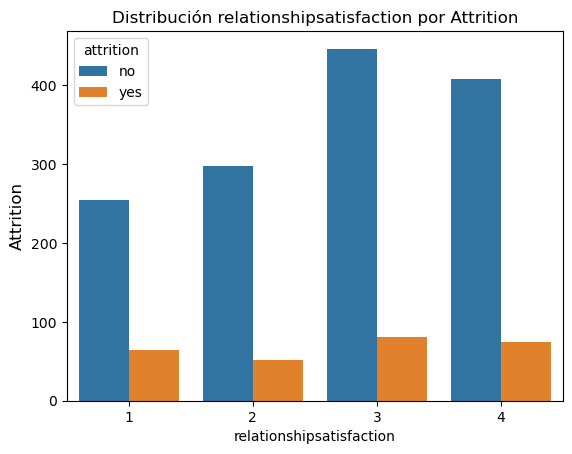

<Figure size 1200x600 with 0 Axes>

In [66]:
sns.countplot(data=df, x='relationshipsatisfaction', hue='attrition')
plt.title('Distribución relationshipsatisfaction por Attrition')
plt.xlabel('relationshipsatisfaction', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.figure(figsize=(12, 6))  # Ancho x Alto
plt.tight_layout()  # <- evita que se corte el texto
plt.show()

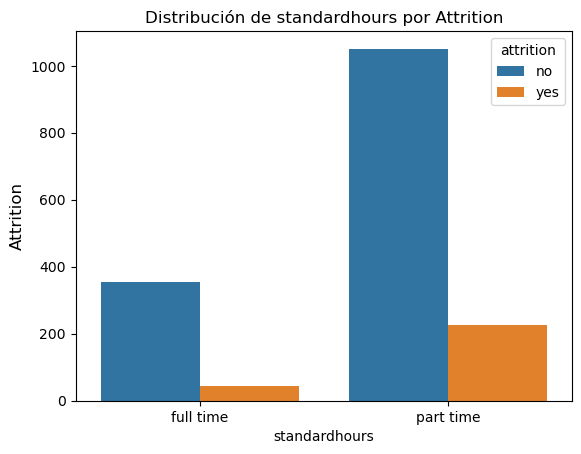

<Figure size 1200x600 with 0 Axes>

In [67]:
sns.countplot(data=df, x='standardhours', hue='attrition')
plt.title('Distribución de standardhours por Attrition')
plt.xlabel('standardhours', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.figure(figsize=(12, 6))  # Ancho x Alto
plt.tight_layout()  # <- evita que se corte el texto
plt.show()

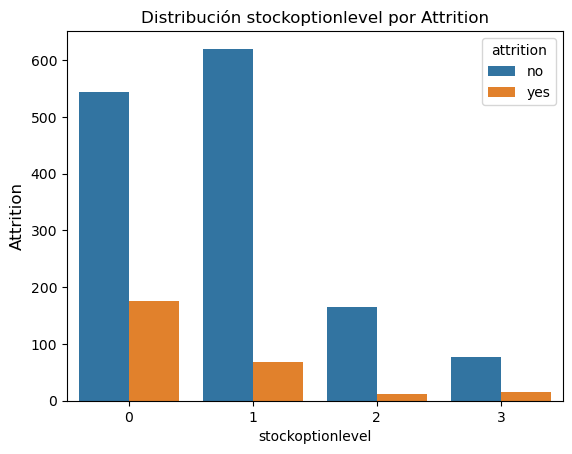

<Figure size 1200x600 with 0 Axes>

In [68]:
sns.countplot(data=df, x='stockoptionlevel', hue='attrition')
plt.title('Distribución stockoptionlevel por Attrition')
plt.xlabel('stockoptionlevel', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.figure(figsize=(12, 6))  # Ancho x Alto
plt.tight_layout()  # <- evita que se corte el texto
plt.show()

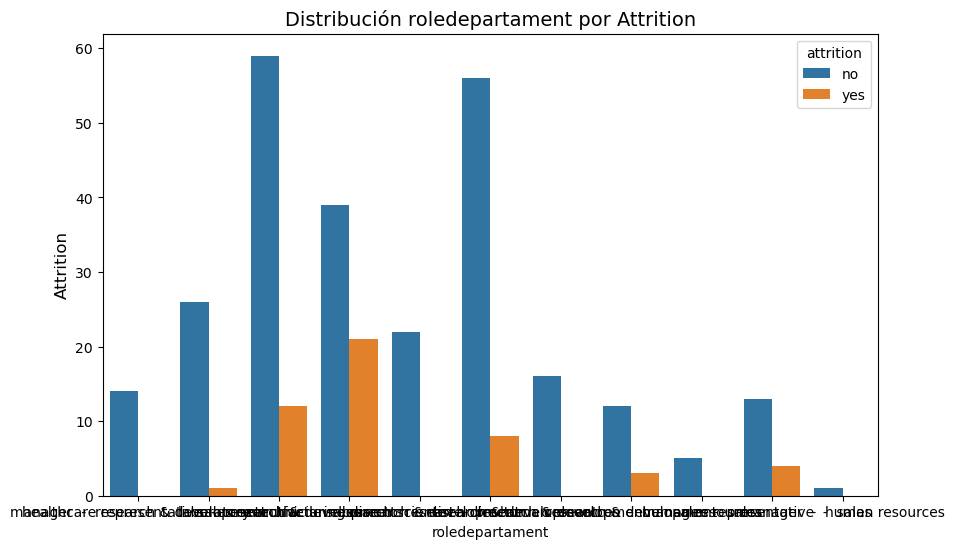

<Figure size 1200x600 with 0 Axes>

In [69]:
plt.figure(figsize=(10, 6))  # antes del countplot
sns.countplot(data=df, x='roledepartament', hue='attrition')
plt.title('Distribución roledepartament por Attrition' ,fontsize=14)
plt.xlabel('roledepartament', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.figure(figsize=(12, 6))  # Ancho x Alto
plt.tight_layout()  # <- evita que se corte el texto
plt.show()


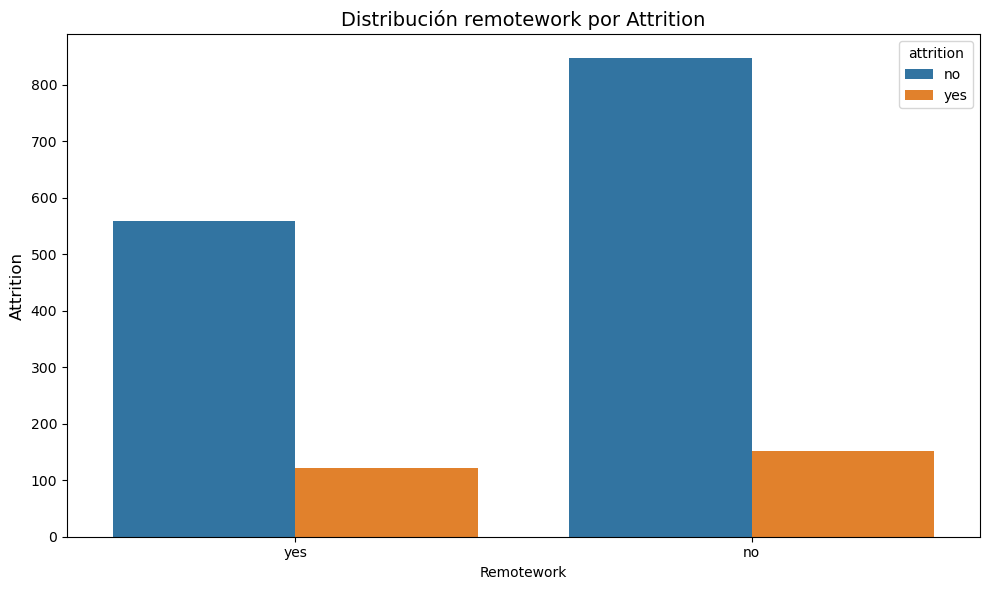

In [70]:
plt.figure(figsize=(10, 6))  # antes del countplot
sns.countplot(data=df, x='remotework', hue='attrition')
plt.title('Distribución remotework por Attrition', fontsize=14)
plt.xlabel('Remotework', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.tight_layout()  # <- evita que se corte el texto

plt.show()

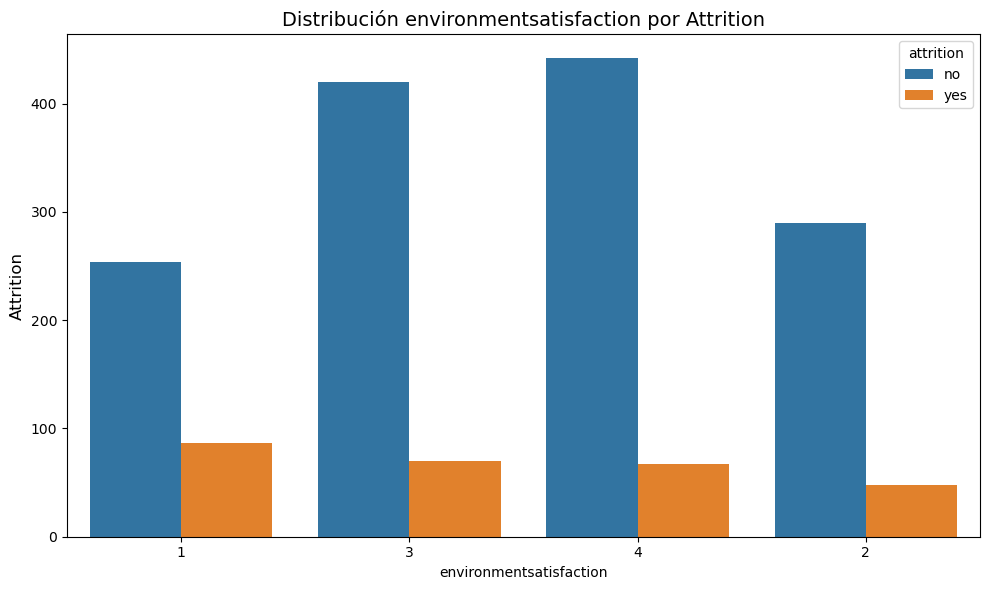

In [71]:
plt.figure(figsize=(10, 6))  # antes del countplot
sns.countplot(data=df, x='environmentsatisfaction', hue='attrition')
plt.title('Distribución environmentsatisfaction por Attrition', fontsize=14)
plt.xlabel('environmentsatisfaction', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.tight_layout()  # <- evita que se corte el texto

plt.show()

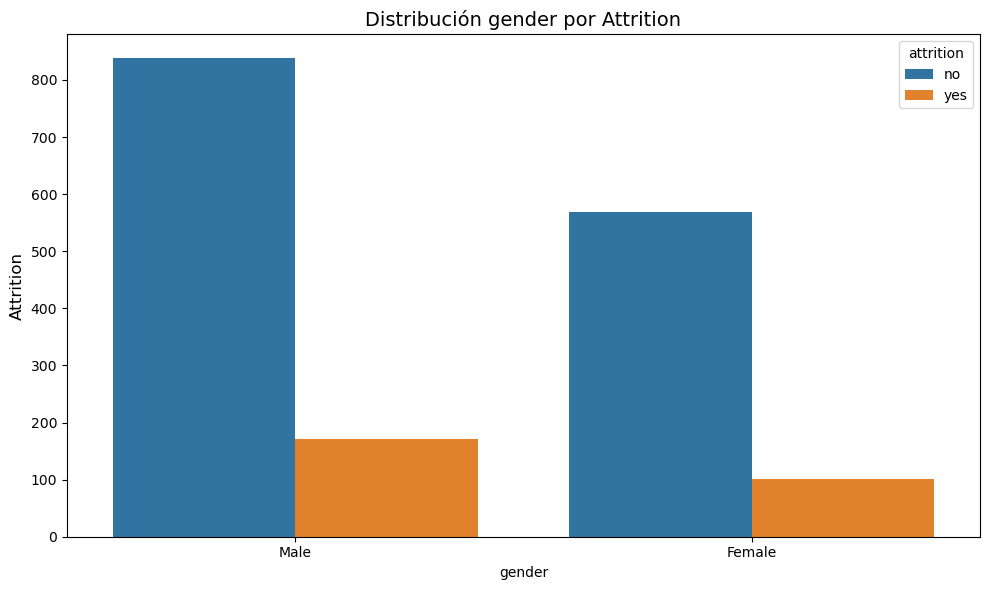

In [72]:
plt.figure(figsize=(10, 6))  # antes del countplot
sns.countplot(data=df, x='gender', hue='attrition')
plt.title('Distribución gender por Attrition', fontsize=14)
plt.xlabel('gender', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.tight_layout()  # <- evita que se corte el texto


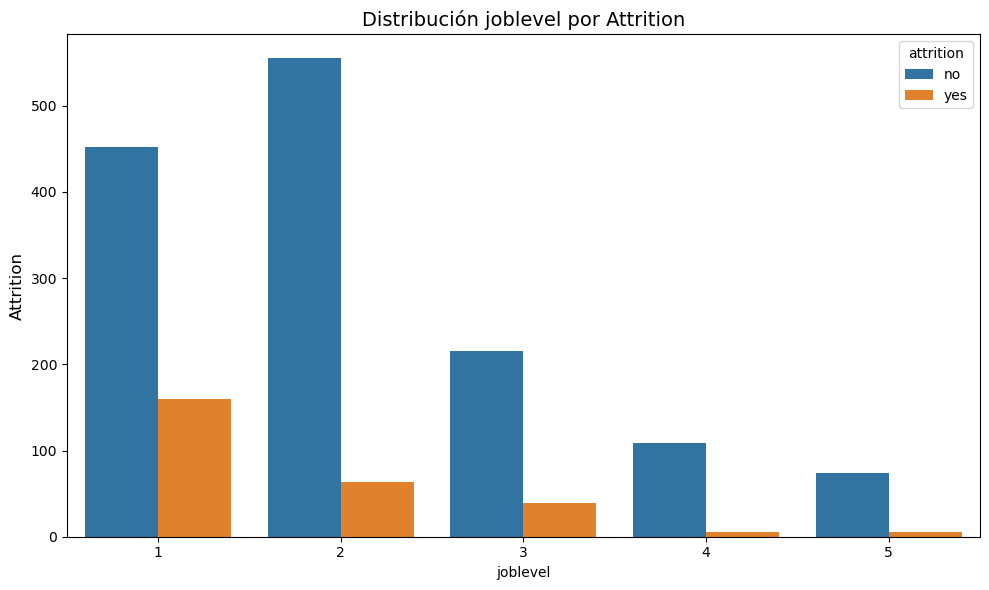

In [73]:
plt.figure(figsize=(10, 6))  # antes del countplot
sns.countplot(data=df, x='joblevel', hue='attrition')
plt.title('Distribución joblevel por Attrition', fontsize=14)
plt.xlabel('joblevel', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.tight_layout()  # <- evita que se corte el texto



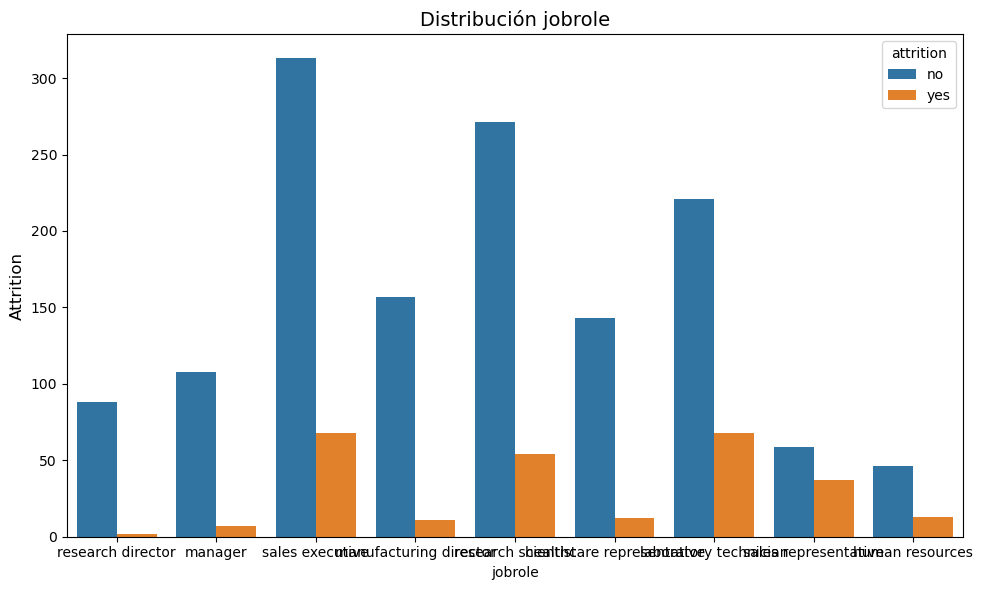

In [74]:
plt.figure(figsize=(10, 6))  # antes del countplot
sns.countplot(data=df, x='jobrole', hue='attrition')
plt.title('Distribución jobrole', fontsize=14)
plt.xlabel('jobrole', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.tight_layout()  # <- evita que se corte el texto


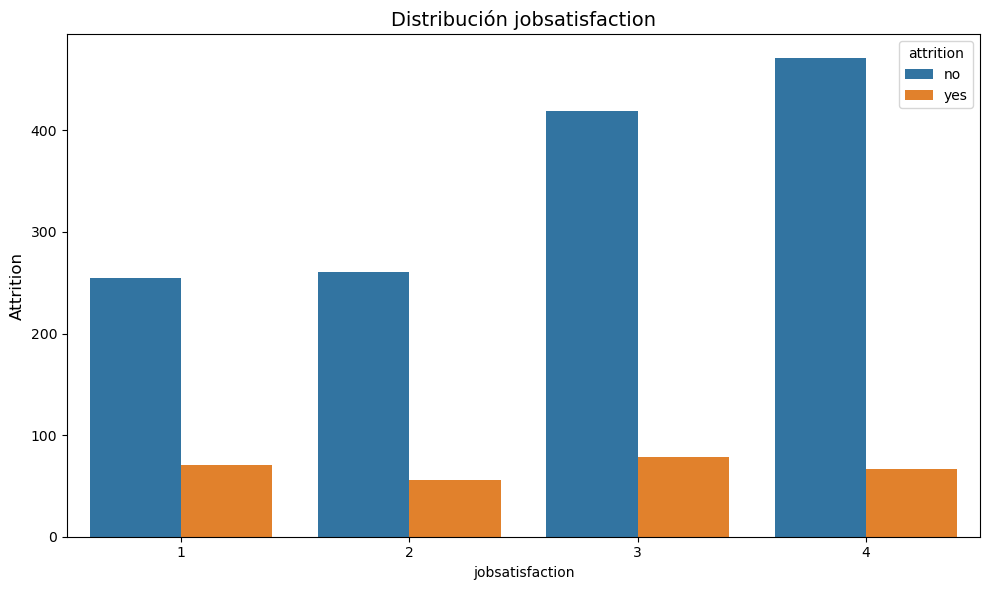

In [75]:
plt.figure(figsize=(10, 6))  # antes del countplot
sns.countplot(data=df, x='jobsatisfaction', hue='attrition')
plt.title('Distribución jobsatisfaction', fontsize=14)
plt.xlabel('jobsatisfaction', fontsize=10)
plt.ylabel('Attrition', fontsize=12)
plt.tight_layout()  # <- evita que se corte el texto


## Gráficos entre attririon (categorica) y variables numéricas

In [76]:
def grafico_boxplot(df, col_categoria, col_numero):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col_categoria, y=col_numero, data=df)
    plt.title(f'Boxplot de {col_numero} por {col_categoria}')
    plt.xlabel(col_categoria)
    plt.ylabel(col_numero)
    plt.show()

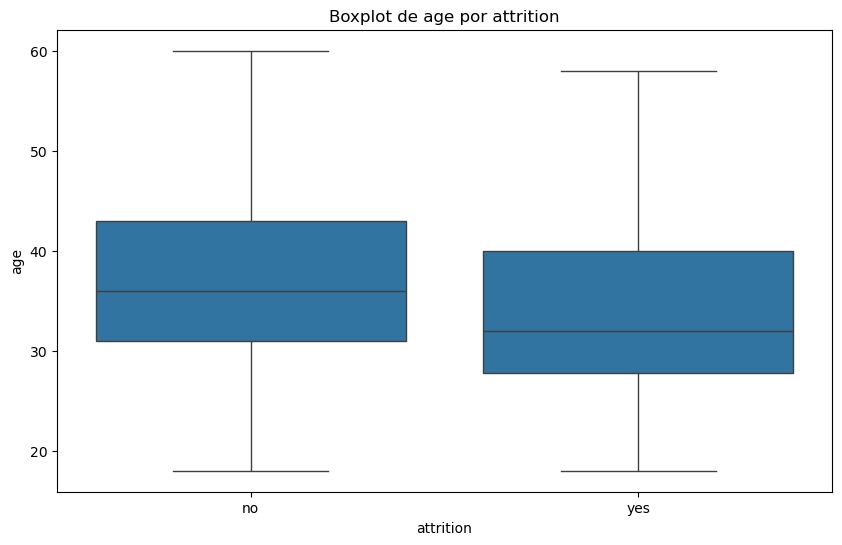

In [77]:
grafico_boxplot(df, 'attrition', 'age')

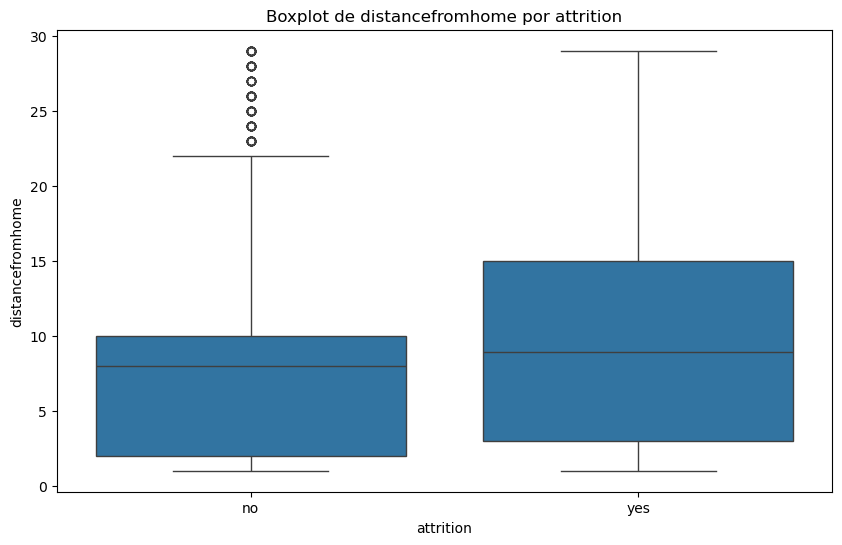

In [78]:
grafico_boxplot(df, 'attrition', 'distancefromhome')

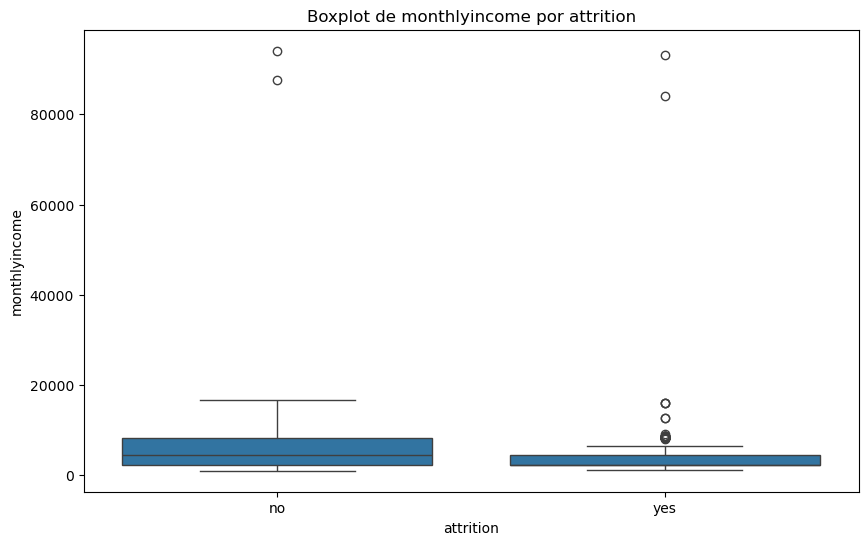

In [79]:
grafico_boxplot(df, 'attrition', 'monthlyincome')



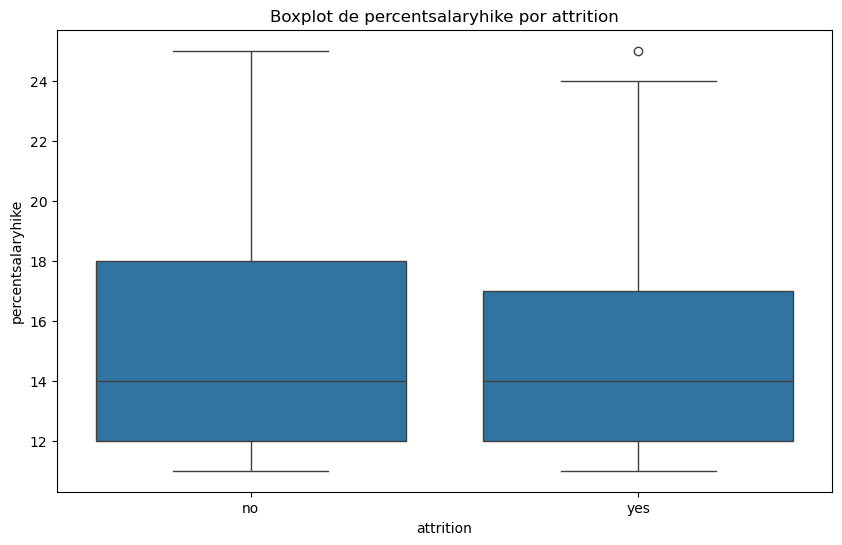

In [80]:
grafico_boxplot(df, 'attrition', 'percentsalaryhike')

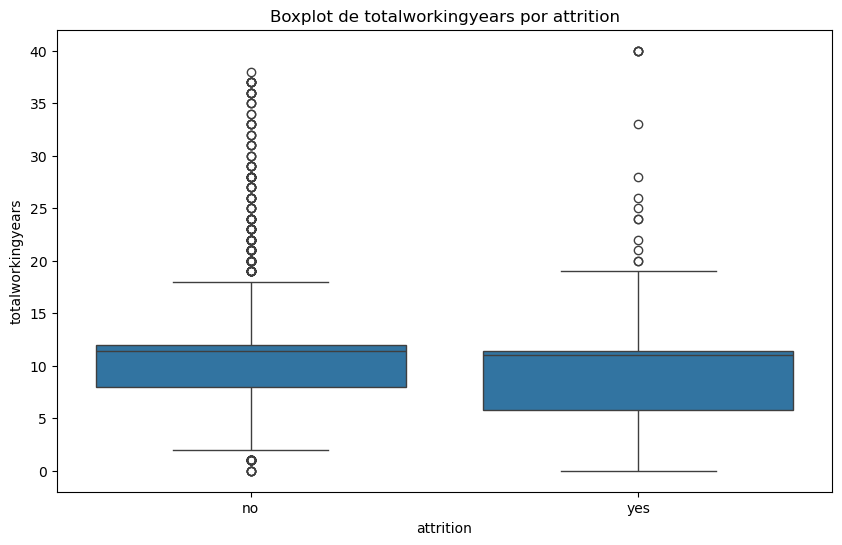

In [81]:
grafico_boxplot(df, 'attrition', 'totalworkingyears')


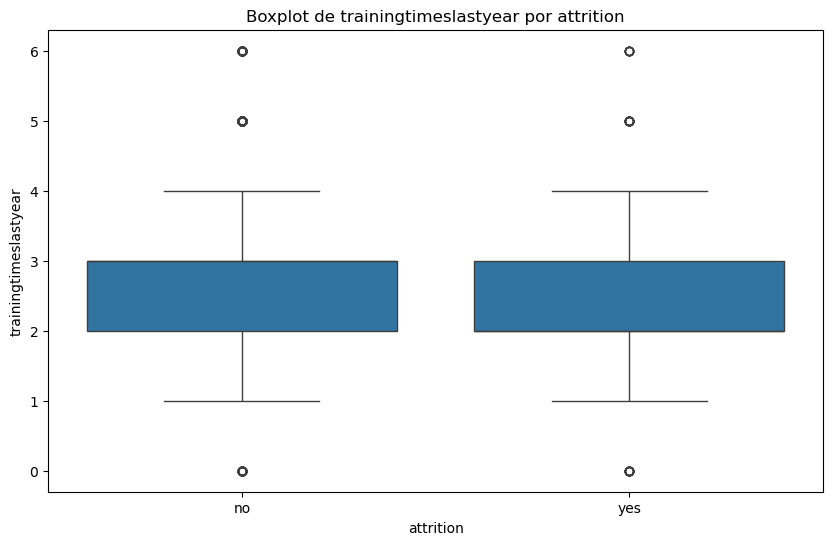

In [82]:
grafico_boxplot(df, 'attrition', 'trainingtimeslastyear')

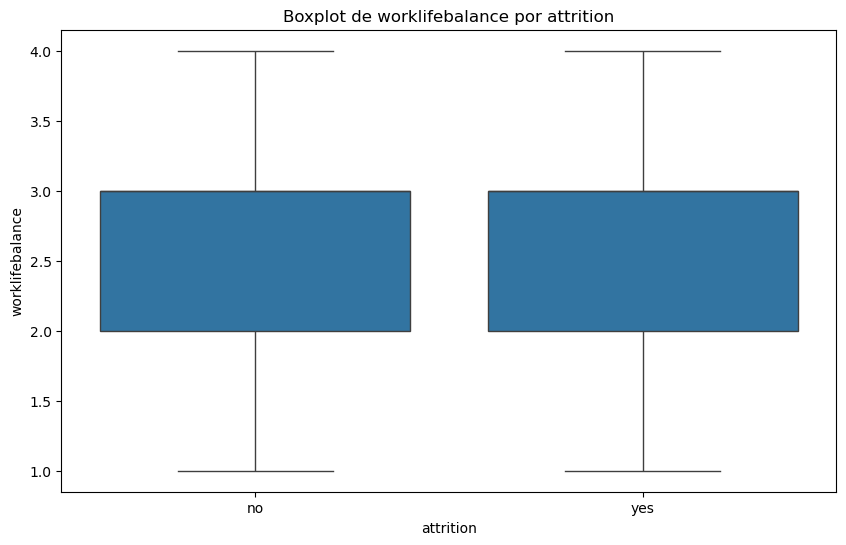

In [83]:
grafico_boxplot(df, 'attrition', 'worklifebalance')


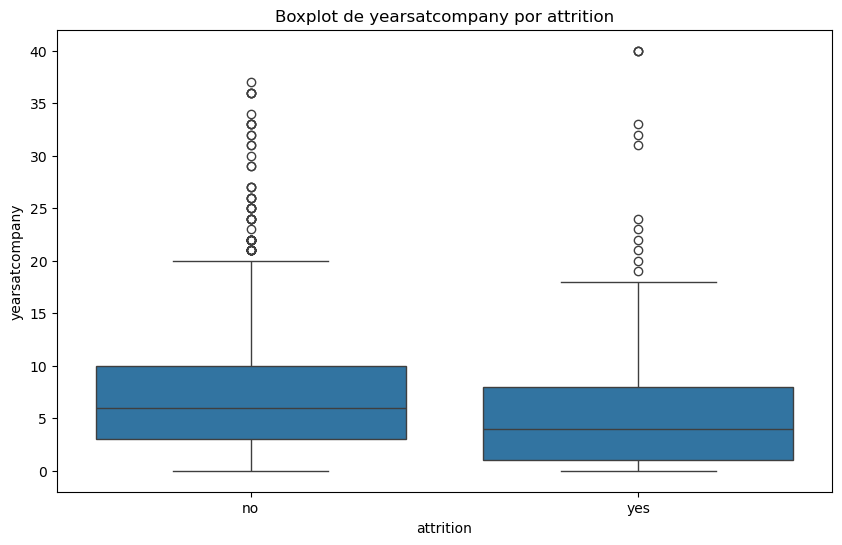

In [84]:
grafico_boxplot(df, 'attrition', 'yearsatcompany')

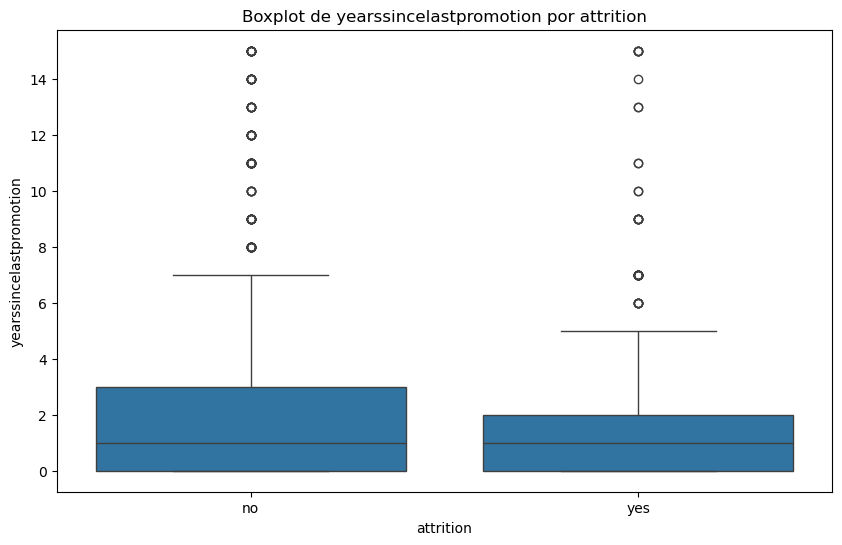

In [85]:
grafico_boxplot(df, 'attrition', 'yearssincelastpromotion')

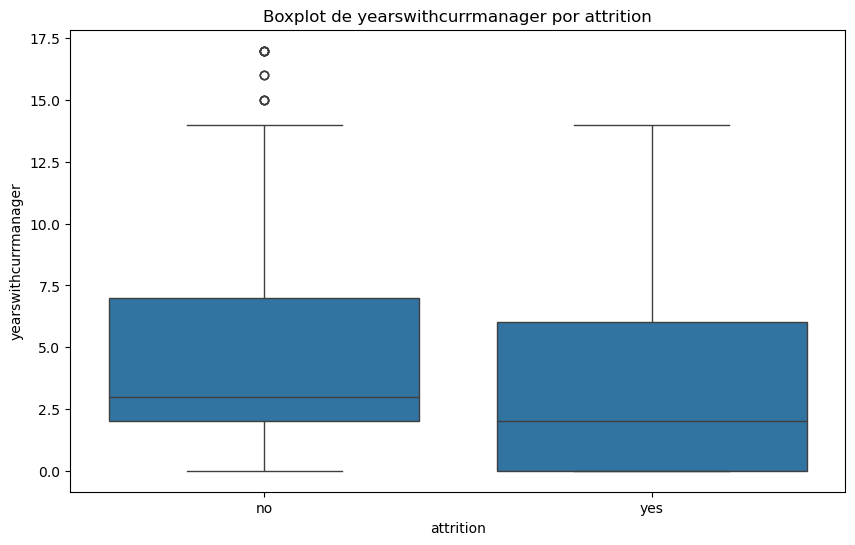

In [86]:
grafico_boxplot(df, 'attrition', 'yearswithcurrmanager')


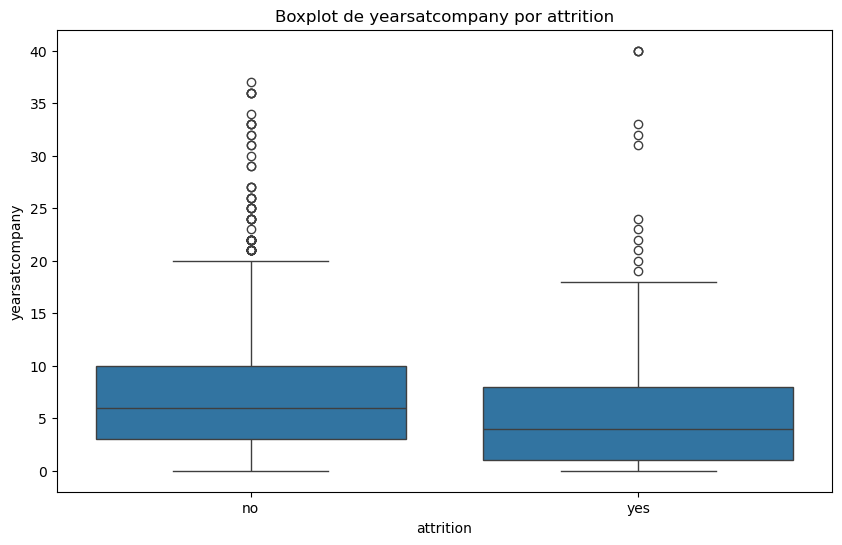

In [87]:
grafico_boxplot(df, 'attrition', 'yearsatcompany')


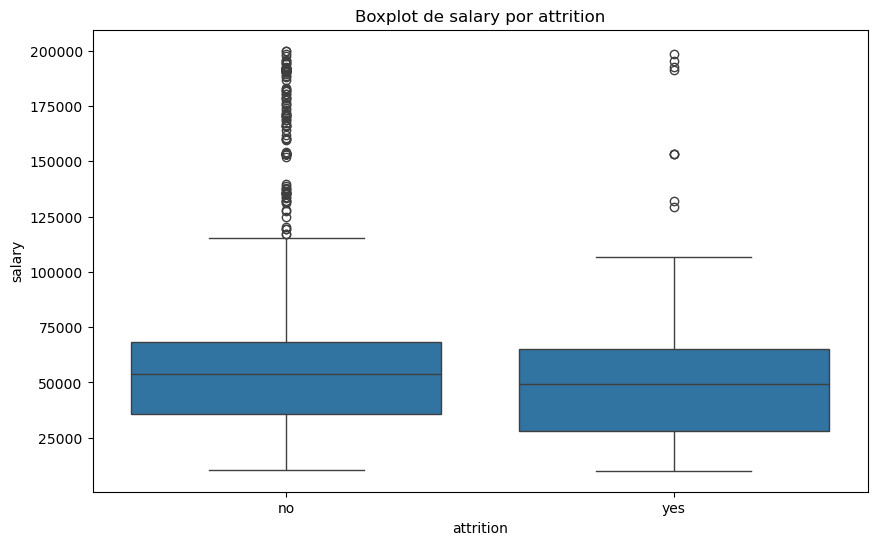

In [88]:
grafico_boxplot(df, 'attrition', 'salary')